In [1]:
# target_features = ['GrainYield']
target_features = ['Days2Maturity']

# Importing Libraries

In [2]:
import sys
# prints the location of current python env
print(sys.prefix)
# print which python executable am I running
sys.executable

# In Anaconda Prompt, run the following
# where python
# where pip

# to find out where are the python executables located on disk


C:\ProgramData\Anaconda3


'C:\\ProgramData\\Anaconda3\\python.exe'

In [3]:
# import sklearn
# print (sklearn.__version__)
# !pip list -o

In [4]:
import os
import csv
import math
from datetime import datetime as dt
import numpy as np
import pandas as pd
from copy import copy
from tqdm import tqdm
from time import sleep

# Dictionaries
import json
from pprint import pprint

# Iterate in loops
import itertools
from itertools import zip_longest

# Simpsons integration
from numpy import trapz
from scipy.integrate import simps

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# To display df nicely in loops
from IPython.display import display 
# display(df1.head()) 
# display(df2.head())

# Display rows and columns Pandas
pd.options.display.max_columns = 100
pd.set_option('display.max_rows',100)

# # For displaying max rows in series
# pd.options.display.max_rows = 10

In [5]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance

# Importing data

In [6]:
# Prints the current working directory
os.getcwd()
# os.listdir()

'C:\\Users\\fahad\\MegaSync\\NMBU\\GitHub\\vPheno'

## Finding Username folder to make general path for multi PC use

In [7]:
username = str(os.getcwd()).split('\\')[2]
user_path = r'C:/Users/'+username+'/'
username, user_path

('fahad', 'C:/Users/fahad/')

## Declaring Import paths

In [8]:
main_path = r'./Data/'
path = r'./Data/3. merged data/'
if target_features[0] == 'GrainYield':
    export_path = './Data/4. results/'
    export_path_comparability = './Data/4. results/comparability/'
elif target_features[0] == 'Days2Maturity':
    export_path = './Data/4. results_dm/'
    export_path_comparability = './Data/4. results_dm/comparability/'

# Create export_path folder if not exists already
os.makedirs(path, exist_ok=True)
os.makedirs(export_path, exist_ok=True)
os.makedirs(export_path_comparability, exist_ok=True)

os.listdir(path)

['Graminor_2019_Simps.csv',
 'Graminor_2019_Trapz.csv',
 'Graminor_2020_Simps.csv',
 'Graminor_2020_Trapz.csv',
 'Masbasis_2019_Simps.csv',
 'Masbasis_2019_Trapz.csv',
 'Masbasis_2020_Simps.csv',
 'Masbasis_2020_Trapz.csv',
 'Robot_2020_Simps.csv',
 'Robot_2020_Trapz.csv',
 'Staur_2019_Simps.csv',
 'Staur_2019_Trapz.csv',
 'Staur_2020_Simps.csv',
 'Staur_2020_Trapz.csv']

In [9]:
# Making dictionary of files in each folder, in case there are multiple types of data
dict_paths = {}
def explore(starting_path):
    for dirpath, dirnames, filenames in os.walk(starting_path):
        dict_paths[dirpath.split('/')[-2]] = filenames
#     pprint(dict_paths)
explore(path)

# Data Preparation
## Creating list of complete files

In [10]:
# Get the list of all files in directory tree at given path

files_with_address = []
files_list = []

for (dirpath, dirnames, filenames) in os.walk(path):
    files_with_address += [os.path.join(dirpath, file) for file in filenames]
    files_list.extend(filenames)
    
print(len(files_with_address), 'files found in the directory')
# files_with_address
files_list

14 files found in the directory


['Graminor_2019_Simps.csv',
 'Graminor_2019_Trapz.csv',
 'Graminor_2020_Simps.csv',
 'Graminor_2020_Trapz.csv',
 'Masbasis_2019_Simps.csv',
 'Masbasis_2019_Trapz.csv',
 'Masbasis_2020_Simps.csv',
 'Masbasis_2020_Trapz.csv',
 'Robot_2020_Simps.csv',
 'Robot_2020_Trapz.csv',
 'Staur_2019_Simps.csv',
 'Staur_2019_Trapz.csv',
 'Staur_2020_Simps.csv',
 'Staur_2020_Trapz.csv']

## Data Checking/control

### Check for duplicate filenames

In [11]:
print('Total number of files are :', len(files_list))

print('Number of unique file names are:', len(set(files_list)))

print('There is/are', len(files_list) - len(set(files_list)),'duplicate file name/names.')
if len(files_list) - len(set(files_list)) > 0:
    raise NameError

Total number of files are : 14
Number of unique file names are: 14
There is/are 0 duplicate file name/names.


# Importing data files to Pandas

In [12]:
all_df = []
for data in files_with_address:
    file_name = os.path.splitext(os.path.basename(data))[0]

    # Replce all invalid characters in the name
    file_name = file_name.replace(" ", "_")
    file_name = file_name.replace("-", "_")
    file_name = file_name.replace(")", "")
    file_name = file_name.replace("(", "")
    df_name = file_name.replace(".", "")
    # Test: Check if the same date is already present in the current dict key
    if df_name in all_df:
        print(f'A file with the same name {df_name} has already been imported. \n Please check if there is duplication of data.')
        raise NameError
    all_df.append(df_name)

    locals()[df_name] = pd.read_csv(data, index_col=False)
    print(df_name, '=====', locals()[df_name].shape)
# all_df

Graminor_2019_Simps ===== (600, 123)
Graminor_2019_Trapz ===== (600, 123)
Graminor_2020_Simps ===== (800, 123)
Graminor_2020_Trapz ===== (800, 123)
Masbasis_2019_Simps ===== (528, 124)
Masbasis_2019_Trapz ===== (528, 124)
Masbasis_2020_Simps ===== (659, 126)
Masbasis_2020_Trapz ===== (659, 126)
Robot_2020_Simps ===== (96, 125)
Robot_2020_Trapz ===== (96, 125)
Staur_2019_Simps ===== (1328, 127)
Staur_2019_Trapz ===== (1328, 127)
Staur_2020_Simps ===== (1504, 124)
Staur_2020_Trapz ===== (1504, 124)


In [13]:
print(f'Total imported {len(all_df)}')
all_df

Total imported 14


['Graminor_2019_Simps',
 'Graminor_2019_Trapz',
 'Graminor_2020_Simps',
 'Graminor_2020_Trapz',
 'Masbasis_2019_Simps',
 'Masbasis_2019_Trapz',
 'Masbasis_2020_Simps',
 'Masbasis_2020_Trapz',
 'Robot_2020_Simps',
 'Robot_2020_Trapz',
 'Staur_2019_Simps',
 'Staur_2019_Trapz',
 'Staur_2020_Simps',
 'Staur_2020_Trapz']

# Finding yield columns

## Importing Weather variables, yield columns, spectral indices, base indices columsn list

In [14]:
a_file = open(main_path+'vollebekk_weather_columns.json', "r")
output_str = a_file.read()
# The file is imported as string

# Converting it to python format
weather_cols_vollebekk = json.loads(output_str)
a_file.close()

pprint(len(weather_cols_vollebekk))

80


In [15]:
a_file = open(main_path+'staur_weather_columns.json', "r")
output_str = a_file.read()
# The file is imported as string

# Converting it to python format
weather_cols_staur = json.loads(output_str)
a_file.close()

pprint(len(weather_cols_staur))

80


In [16]:
a_file = open(main_path+"yield_columns.json", "r")
output_str = a_file.read()

# The file is imported as string
# Converting it to python format
yield_cols = json.loads(output_str)
a_file.close()
print(yield_cols)

['Entry', 'Replicates', 'Name', 'Lodging', 'GrainYield', 'iBlock', 'Line', 'Pedigree', 'Block', 'Days2Maturity', 'CodeName', 'Heading_Date', 'Days2Heading', 'Maturity_Date']


In [17]:
a_file = open(main_path+"spectral_indices_columns.json", "r")
output_str = a_file.read()

# The file is imported as string
# Converting it to python format
spectral_indices_all = json.loads(output_str)
a_file.close()
print(spectral_indices_all)

['NDVI', 'MTCI', 'DVI', 'GDVI', 'MTCI_CI', 'EXG', 'EXGR', 'RDVI', 'TDVI', 'GNDVI', 'NDRE', 'SCCI', 'EVI', 'TVI', 'VARI', 'GARI', 'GCI', 'GLI', 'NLI', 'MNLI', 'SAVI', 'GSAVI', 'OSAVI', 'GOSAVI', 'MSAVI2', 'MSR', 'GRVI', 'WDRVI', 'SR']


In [18]:
a_file = open(main_path+"base_indices_columns.json", "r")
output_str = a_file.read()

# The file is imported as string
# Converting it to python format
base_indices = json.loads(output_str)
a_file.close()
print(base_indices)

['Blue', 'Green', 'Red', 'RedEdge', 'NIR']


## Defining categories of features

In [19]:
# ToDo: Add check for duplicate columns in the df

base_indices

spectral_indices_all 

drop_indices = ['EVI', 'GLI', 'MTCI']

spectral_indices = [x for x in spectral_indices_all if x not in drop_indices]

# Staur weather columns are all also present in Vollebekk weather so they can be use as general weather features
weather_features = weather_cols_staur.copy()

environment_var = weather_features + ['Staur_Env', 'Vollebekk_Env']

yield_cols



['Entry',
 'Replicates',
 'Name',
 'Lodging',
 'GrainYield',
 'iBlock',
 'Line',
 'Pedigree',
 'Block',
 'Days2Maturity',
 'CodeName',
 'Heading_Date',
 'Days2Heading',
 'Maturity_Date']

# Dropping DF which donot have DM

In [20]:
# Dropping unnecessary columns
all_df_dm = []
for df in all_df:
    temp_df = locals()[df].copy()
    if target_features[0] in temp_df.columns.tolist():
        all_df_dm.append(df)
        print(df)

Masbasis_2019_Simps
Masbasis_2019_Trapz
Masbasis_2020_Simps
Masbasis_2020_Trapz
Robot_2020_Simps
Robot_2020_Trapz
Staur_2019_Simps
Staur_2019_Trapz


In [21]:
all_df_simps = [x for x in all_df_dm if 'Simps' in x]
all_df_trapz = [x for x in all_df_dm if 'Trapz' in x]
all_df_simps, all_df_trapz

(['Masbasis_2019_Simps',
  'Masbasis_2020_Simps',
  'Robot_2020_Simps',
  'Staur_2019_Simps'],
 ['Masbasis_2019_Trapz',
  'Masbasis_2020_Trapz',
  'Robot_2020_Trapz',
  'Staur_2019_Trapz'])

# Dropping unnecessary columns


In [22]:
# Dropping unnecessary columns

for df in all_df_dm:
    temp_df = locals()[df].copy()
    locals()[df] = temp_df[base_indices+spectral_indices_all+environment_var+['Name',target_features[0]]]
    print(df, temp_df.shape, '==>', locals()[df].shape)


Masbasis_2019_Simps (528, 124) ==> (528, 118)
Masbasis_2019_Trapz (528, 124) ==> (528, 118)
Masbasis_2020_Simps (659, 126) ==> (659, 118)
Masbasis_2020_Trapz (659, 126) ==> (659, 118)
Robot_2020_Simps (96, 125) ==> (96, 118)
Robot_2020_Trapz (96, 125) ==> (96, 118)
Staur_2019_Simps (1328, 127) ==> (1328, 118)
Staur_2019_Trapz (1328, 127) ==> (1328, 118)


# Dealing with Nan values

## Dropping Missing values

In [23]:
# Dropping rows with missing value in any column

for df in all_df_dm:
    temp_df = locals()[df].copy()
    locals()[df] = temp_df.dropna(axis=0)
    print(temp_df.shape[0] - locals()[df].shape[0], ' rows dropped in ', df)
#     print(locals()[df].shape[0])

0  rows dropped in  Masbasis_2019_Simps
0  rows dropped in  Masbasis_2019_Trapz
112  rows dropped in  Masbasis_2020_Simps
112  rows dropped in  Masbasis_2020_Trapz
8  rows dropped in  Robot_2020_Simps
8  rows dropped in  Robot_2020_Trapz
800  rows dropped in  Staur_2019_Simps
800  rows dropped in  Staur_2019_Trapz


# Plot one index for different fields to check comparability

In [24]:
# for col in base_indices+spectral_indices:
# #     col='Blue'
#     fig_size=(8, 5)
#     fig, ax = plt.subplots(figsize=fig_size)
#     plots = ax

#     for df in all_df_simps:
# #         if not 'Robot' in df and  not 'Staur' in df:
# #         if 'Gram' in df and  'Masb' in df:
# #             if '2020' in df:
#         temp_df = locals()[df].copy()
#         ax.boxplot(sorted(temp_df[col].values), positions = [all_df_simps.index(df)], labels=[df.split('_')[0][:5]+'_'+df.split('_')[1]])
# #         ax.plot(sorted(temp_df[col].values), label=df.split('_')[0]+'_'+df.split('_')[1])
#     # Printing the band/index name in plot of the fiels_sample for reference
#     text = col
#     ax.text(.95, .98, text, ha='center', va='top', weight=100, color='blue', fontsize ='xx-large', transform=ax.transAxes)

#     ax.legend(loc=1)
#     plt.tight_layout()
# #     plt.savefig(export_path_comparability+col+'_box.jpg',dpi=250, bbox_inches='tight', transform=ax.transAxes)
#     plt.show()
# #     break

In [25]:
# for col in base_indices+spectral_indices:
# #     col='Blue'
#     fig_size=(8, 5)
#     fig, ax = plt.subplots(figsize=fig_size)
#     plots = ax

#     for df in all_df_simps:
# #         if not 'Robot' in df and  not 'Staur' in df:
# #         if 'Gram' in df and  'Masb' in df:
# #             if '2020' in df:
#         temp_df = locals()[df].copy()
# #         ax.boxplot(sorted(temp_df[col].values), positions = [all_df_simps.index(df)], labels=[df.split('_')[0][:5]+'_'+df.split('_')[1]])
#         ax.plot(sorted(temp_df[col].values), label=df.split('_')[0]+'_'+df.split('_')[1])
#     # Printing the band/index name in plot of the fiels_sample for reference
#     text = col
#     ax.text(.87, .6, text, ha='center', va='top', weight=100, color='blue', fontsize ='xx-large', transform=ax.transAxes)

#     ax.legend(loc=1)
#     plt.tight_layout()
# #     plt.savefig(export_path_comparability+col+'_sorted.jpg',dpi=250, bbox_inches='tight', transform=ax.transAxes)
#     plt.show()
# #     break

In [26]:
# for col in base_indices+spectral_indices:
# #     col='Blue'
#     fig_size=(8, 5)
#     fig, ax = plt.subplots(figsize=fig_size)
#     plots = ax

#     for df in all_df_simps:
# #         if not 'Robot' in df and  not 'Staur' in df:
# #         if 'Gram' in df and  'Masb' in df:
# #             if '2020' in df:
#         temp_df = locals()[df].copy()
# #         ax.boxplot(sorted(temp_df[col].values), positions = [all_df_simps.index(df)], labels=[df.split('_')[0][:5]+'_'+df.split('_')[1]])
#         ax.plot((temp_df[col].values), label=df.split('_')[0]+'_'+df.split('_')[1])
#     # Printing the band/index name in plot of the fiels_sample for reference
#     text = col
#     ax.text(.87, .6, text, ha='center', va='top', weight=100, color='blue', fontsize ='xx-large', transform=ax.transAxes)

#     ax.legend(loc=1)
#     plt.tight_layout()
# #     plt.savefig(export_path_comparability+col+'_random.jpg',dpi=250, bbox_inches='tight', transform=ax.transAxes)
#     plt.show()
# #     break

# Normalizing the data using Z-Score from scipy

In [27]:
from scipy.stats import zscore

for df in all_df_dm:
    temp_df = locals()[df].copy()
    for col in temp_df.columns:
        # Checking if the column is not a yield column
        if col not in yield_cols+environment_var:
            temp_df[col] = zscore(temp_df[col])
    locals()[df] = temp_df.copy()
    print(df)

Masbasis_2019_Simps
Masbasis_2019_Trapz
Masbasis_2020_Simps
Masbasis_2020_Trapz
Robot_2020_Simps
Robot_2020_Trapz
Staur_2019_Simps
Staur_2019_Trapz


# Checking comparability after normalization

In [28]:
# for col in base_indices+spectral_indices:
# #     col='Blue'
#     fig_size=(8, 5)
#     fig, ax = plt.subplots(figsize=fig_size)
#     plots = ax

#     for df in all_df_simps:
# #         if not 'Robot' in df and  not 'Staur' in df:
# #         if 'Gram' in df and  'Masb' in df:
# #             if '2020' in df:
#         temp_df = locals()[df].copy()
#         ax.boxplot(sorted(temp_df[col].values), positions = [all_df_simps.index(df)], labels=[df.split('_')[0][:5]+'_'+df.split('_')[1]])
# #         ax.plot(sorted(temp_df[col].values), label=df.split('_')[0]+'_'+df.split('_')[1])
#     # Printing the band/index name in plot of the fiels_sample for reference
#     text = col
#     ax.text(.87, .6, text, ha='center', va='top', weight=100, color='blue', fontsize ='xx-large', transform=ax.transAxes)

#     ax.legend(loc=1)
#     plt.tight_layout()
# #     plt.savefig(export_path_comparability+col+'_box.jpg',dpi=250, bbox_inches='tight', transform=ax.transAxes)
#     plt.show()
# #     break

# Correlation

## Scatter Plot

In [29]:
# for df in all_df_simps:
#     temp_df = locals()[df][base_indices+spectral_indices+[target_features[0]]].copy()
#     data = temp_df.copy()
#     for col in base_indices:
#         print(df)
#         df_a = temp_df[col]
#         df_b = temp_df[target_features[0]]


#         fig, ax = plt.subplots(1, figsize=(12,8))
#         sns.kdeplot(df_a, y=df_b, cmap='Blues',
#                    shade=True, thresh=0.05, clip=(-1,300))
#         plt.scatter(df_a, df_b, color='orangered')
#         plt.show()

## Heat Map

In [30]:
# for df in all_df_simps:
#     print(df)
#     temp_df = locals()[df][[target_features[0]]+spectral_indices].copy()
# #     temp_df = locals()[df][spectral_indices+[target_features[0]]].copy()
#     data = temp_df
#     columns = temp_df.columns
#     corr = data.corr()
#     fig_size=(15,8)

#     fig, ax = plt.subplots(figsize=fig_size)
    
#     mask = np.triu(np.ones_like(corr, dtype=np.bool))

    
#     ax = sns.heatmap(
#         corr, mask=mask,
#         vmin=-1, vmax=1, center=0,
#         cmap=sns.diverging_palette(20, 220, n=200),
#         square=True
#     )    
    
#     ax.set_xticklabels(
#         ax.get_xticklabels(),
#         rotation=45,
#         horizontalalignment='right'
#     );
#     plt.show()

# Preprocessing 

## Declaring functions

### Save Results

In [31]:
from datetime import datetime as dt


def save_results(model, agg_method, train_field, test_field,
                 training_features, importances, RMSE_test,
                 RMSE_train, R2_test, R2_train, GKF_CV):

    date_time = dt.now()
    train_feat = []
    if set(spectral_indices_all) <= set(training_features):
        train_feat.append('spectral_indices_all')
    elif set(spectral_indices) <= set(training_features):
        train_feat.append('spectral_indices_select')
    if set(weather_features) <= set(training_features):
        train_feat.append('weather_features')
    if set(base_indices) <= set(training_features):
        train_feat.append('base_indices')
    if set(['Staur_Env', 'Vollebekk_Env']) <= set(training_features):
        train_feat.append('Environment_feature')
        
    results = {'Model': model,
               'Aggregation_method': agg_method,
               'Train_field': train_field,
               'Test_field': test_field,
               'Training_features': train_feat,
               'Feature_Importances': importances,
               'RMSE_test': RMSE_test,
               'RMSE_train': RMSE_train,
               'R2_test': R2_test,
               'R2_train': R2_train,
               'GKF_CV': GKF_CV,
               'DataTime': date_time}

    filename = export_path + 'results_org.csv'

    with open(filename, "a+") as csvfile:
        headers = results.keys()
        writer = csv.DictWriter(csvfile, delimiter=',',
                                lineterminator='\n', fieldnames=headers)

        # Check is the file is empty or not
        fileEmpty = os.stat(filename).st_size == 0
        # If empty, then add header
        if fileEmpty:
            writer.writeheader()  # file doesn't exist yet, write a header

        # Write the current data as next row
        writer.writerow(results)
    del(results, date_time)

In [32]:
from datetime import datetime as dt

def save_grid_results(list_zip):
    list_zip_list = list(list_zip[0])
    
    # Appending None entries to list to makeup for missing parameters
    while len(list_zip_list)<14:
        list_zip_list.append(None)
    
    model = list_zip_list[0]
    pipe = list_zip_list[1]
    train_score = list_zip_list[2]
    test_score = list_zip_list[3]
    p1 = list_zip_list[4]
    p2 = list_zip_list[5]
    p3 = list_zip_list[6]
    p4 = list_zip_list[7]
    p5 = list_zip_list[8]
    p6 = list_zip_list[9]
    p7 = list_zip_list[10]
    p8 = list_zip_list[11]
    p9 = list_zip_list[12]
    p10 = list_zip_list[13]

    train_feat = []
    if set(spectral_indices_all) <= set(training_features):
        train_feat.append('spectral_indices_all')
    elif set(spectral_indices) <= set(training_features):
        train_feat.append('spectral_indices_select')
    if set(weather_features) <= set(training_features):
        train_feat.append('weather_features')
    if set(base_indices) <= set(training_features):
        train_feat.append('base_indices')
    if set(['Staur_Env', 'Vollebekk_Env']) <= set(training_features):
        train_feat.append('Environment_feature')
        
    date_time = dt.now()
        
    results = {'Model': model,
               'Pipeline': pipe,
               'Train_score': train_score,
               'Test_score': test_score,
               'Parameter_1': p1,
               'Parameter_2': p2,
               'Parameter_3': p3,
               'Parameter_4': p4,
               'Parameter_5': p5,
               'Parameter_6': p6,
               'Parameter_7': p7,
               'Parameter_8': p8,
               'Parameter_9': p9,
               'Parameter_10': p10,
               'Aggregation_method': agg_method,
               'Training_features': train_feat,
               'DataTime': date_time}

    filename = export_path + 'results_loop_org.csv'

    with open(filename, "a+") as csvfile:
        headers = results.keys()
        writer = csv.DictWriter(csvfile, delimiter=',',
                                lineterminator='\n', fieldnames=headers)

        # Check is the file is empty or not
        fileEmpty = os.stat(filename).st_size == 0
        # If empty, then add header
        if fileEmpty:
            writer.writeheader()  # file doesn't exist yet, write a header

        # Write the current data as next row
        writer.writerow(results)
    del(results, date_time)

### list_test_train_df

In [57]:
def list_test_train_df(all_df_, train_field, test_field, year):
    # Returns a string list of train dfs and test dfs. Not conct
    # Need to be conct afterwards
    
    # year = '2019', '2020', 'all' str
#     train_field = 'Vollebekk' , 'Staur'
#     test_field = 'Vollebekk' , 'Staur'

    # Asserting if the user has given the right inputs
    assert train_field != test_field
    assert train_field == 'Vollebekk' or train_field == 'Staur'
    assert test_field == 'Vollebekk' or test_field == 'Staur'
    assert year == '2019' or year == '2020' or year == 'all'

    # Filtering based on year
    all_df_temp1 = [x for x in all_df_ if not 'Robot' in x]
    if not year == 'all':
        all_df_temp = [x for x in all_df_temp1 if year in x]
    else:
        all_df_temp = all_df_temp1.copy()
        
    # Making list of training dfs for conct before training
    staur_list = []
    for x in all_df_temp:
        if 'Staur' in x:
            staur_list.append(x)

    # Making list of test dfs for conct before training
    vollebekk_list = []
    for x in all_df_temp:
        if not 'Staur' in x and not 'Robot' in x:
            vollebekk_list.append(x)
    
    train_str_list = []
    test_str_list = []
    # Assigning test and train sets based on given inputs
    if train_field == 'Staur':
        train_str_list = staur_list.copy()
        print('Training data:', staur_list)
        
        test_str_list = vollebekk_list.copy()
        print('Test data:', vollebekk_list)
    elif train_field == 'Vollebekk':
        train_str_list = vollebekk_list.copy()
        print('Training data:', vollebekk_list)
        
        test_str_list = staur_list.copy()
        print('Test data:', staur_list)
    else:
        raise NameError
    
    return (train_str_list, test_str_list)
    del (all_df_temp1, all_df_temp, staur_df_list, staur_list, vollebekk_df_list, vollebekk_list, train_df_list, train_str_list, test_df_list, test_str_list)

### data_prep_field

In [34]:
# data_prep_field(all_df_, train_field = ['Staur', 'Masbasis'], test_field = ['Staur', 'Masbasis'], 
#                 year_train = ['2019', 2020], year_test = ['2019', 2020]):

def data_prep_field(all_df_, train_field, test_field, year):
    
    # year = '2019', '2020', 'all' str
#     train_field = 'Vollebekk' , 'Staur'
#     test_field = 'Vollebekk' , 'Staur'

    # Asserting if the user has given the right inputs
    assert train_field != test_field
    assert train_field == 'Vollebekk' or train_field == 'Staur'
    assert test_field == 'Vollebekk' or test_field == 'Staur'
    assert year == '2019' or year == '2020' or year == 'all'

    # Filtering based on year
    all_df_temp1 = [x for x in all_df_ if not 'Robot' in x]
    if not year == 'all':
        all_df_temp = [x for x in all_df_temp1 if year in x]
    else:
        all_df_temp = all_df_temp1.copy()
        
    # Making list of training dfs for conct before training
    staur_df_list = []
    staur_list = []
    print(all_df_temp)
    for x in all_df_temp:
        if 'Staur' in x:
            staur_list.append(x)
            print(staur_list)
#             staur_df_list.append(locals()[x])

    # Making list of test dfs for conct before training
    vollebekk_df_list = []
    vollebekk_list = []
    for x in all_df_temp:
        if not 'Staur' in x and not 'Robot' in x:
            vollebekk_list.append(x)
#             vollebekk_df_list.append(locals()[x])
    
    # Assigning test and train sets based on given inputs
    if train_field == 'Staur':
        train_df_list = staur_df_list.copy()
        print('Training data:', staur_list)
        
        test_df_list = vollebekk_df_list.copy()
        print('Test data:', vollebekk_list)
    elif train_field == 'Vollebekk':
        train_df_list = vollebekk_df_list.copy()
        print('Training data:', vollebekk_list)
        
        test_df_list = staur_df_list.copy()
        print('Test data:', staur_list)
    else:
        raise NameError
        
    train_df = pd.concat(train_df_list)
    test_df = pd.concat(test_df_list)

    X_train = train_df[training_features]
    y_train = train_df[target_features].values.ravel()
    X_test = test_df[training_features]
    y_test = test_df[target_features].values.ravel()
    
    return X_train, y_train, X_test, y_test

### training_gkf_std

In [35]:
def training_gkf_std(model, X, y, gkf):
    
    current_model = make_pipeline(StandardScaler(), model)
#     current_model = make_pipeline(model)

    scores = cross_validate(current_model, X, y, cv=gkf,
                            scoring=('r2', 'neg_root_mean_squared_error'),
                            return_train_score=True)
#     RMSE_test = "%0.2f (+/- %0.2f)" % (-1*scores['test_neg_root_mean_squared_error'].mean(), 
#                                   -1*scores['test_neg_root_mean_squared_error'].std() * 2)
#     RMSE_train = "%0.2f (+/- %0.2f)" % (-1*scores['train_neg_root_mean_squared_error'].mean(), 
#                                   -1*scores['train_neg_root_mean_squared_error'].std() * 2)


#     R2_test = "%0.2f (+/- %0.2f)" % (scores['test_r2'].mean(), 
#                                   scores['test_r2'].std() * 2)
#     R2_train = "%0.2f (+/- %0.2f)" % (scores['train_r2'].mean(), 
#                                   scores['train_r2'].std() * 2)

    RMSE_test = "%0.2f" % (-1*scores['test_neg_root_mean_squared_error'].mean())
    RMSE_train = "%0.2f" % (-1*scores['train_neg_root_mean_squared_error'].mean())


    R2_test = "%0.2f" % (scores['test_r2'].mean())
    R2_train = "%0.2f" % (scores['train_r2'].mean())
    
    print(str(model).split('()')[0])
    print(current_model)
    print(' RMSE Test:', RMSE_test, '       R2 Test:', R2_test)
    print('RMSE Train:', RMSE_train, '      R2 Train:', R2_train)
    
    # Feature importance
    current_model.fit(X, y)
    success = False
    while not success:
        try:
            feature_importance = current_model.steps[1][1].feature_importances_
            success = True
        except:
            feature_importance = None
            break

    # Saving results
    GKF_CV = gkf
    return feature_importance, RMSE_test, RMSE_train, R2_test, R2_train, GKF_CV
    del(current_model, scores, feature_importance, success, RMSE_test, RMSE_train, R2_test, R2_train, GKF_CV)

### training_regr

In [36]:
def training_regr(model, X_train, y_train, X_test, y_test):
    current_model = make_pipeline(StandardScaler(), model)
#     current_model = make_pipeline(model)

    current_model.fit(X_train, y_train)
    y_pred_train = current_model.predict(X_train)
    y_pred = current_model.predict(X_test)
    
    RMSE_test = mean_squared_error(y_test, y_pred, squared=False)
    RMSE_train = mean_squared_error(y_train, y_pred_train, squared=False)


    R2_test = r2_score(y_test, y_pred)
    R2_train = r2_score(y_train, y_pred_train)
    
    print(str(model).split('()')[0])
    print(current_model)
    print(' RMSE Test:', RMSE_test, '       R2 Test:', R2_test)
    print('RMSE Train:', RMSE_train, '      R2 Train:', R2_train)

    # Feature importance
    success = False
    while not success:
        try:
            feature_importance = current_model.steps[1][1].feature_importances_
            success = True
        except:
            feature_importance = None
            break

    GKF_CV = False
    
    return feature_importance, RMSE_test, RMSE_train, R2_test, R2_train, GKF_CV
    del(current_model, y_pred_train, y_pred, feature_importance, success, RMSE_test, RMSE_train, R2_test, R2_train, GKF_CV)

### Plot Feature Importance

In [37]:
# from matplotlib.backends.backend_pdf import PdfPages

# # Create plots folder if not exists already
# os.makedirs(plots_export_path, exist_ok=True)

# pdf = PdfPages(plots_export_path+'feat_imp.pdf')

def plot_feat_imp(feature_importance, model, train_feat, threshold='all', sort_feat=True):
    # threshold =  percentage of max(features_importance) or 'all' or top_x number of features
    # Plotting feature importance
    # Create arrays from feature importance and feature names

    feature_names = train_feat.copy()
    model_name =  str(model).split('(')[0]
    
    # Default threshold is 0, i.e. use all features
    thres = 0

    # Selecting features based on given threshold
    if isinstance(threshold, int) or isinstance(threshold, float):
        thres = threshold * 0.01
    elif str.lower(threshold) == 'all':
        thres = 0

    importances, names = zip(*(
        (x, y) for x, y in zip(feature_importance, feature_names) if x >= thres*max(feature_importance)))
    
    # Finding and filtering top_x number of features
    if isinstance(threshold, str):
        if str.lower(threshold.split('_')[0]) == 'top':
            top_x_feat = int(threshold.split('_')[1])
            sort_imp, sorted_name = zip(*sorted(zip(feature_importance, feature_names), reverse=True))

            importances, names = zip(*(
                (x, y) for x, y in zip(feature_importance, feature_names) if y in sorted_name[:top_x_feat]))  
    
    # Sorting faeture importances if required
    if sort_feat:
        importances, names = zip(*sorted(zip(importances, names), reverse=True))

    # Create a DataFrame using a Dictionary
    data={'feature_names':names,'feature_importance':importances}
    feat_imp_df = pd.DataFrame(data)

    # Sort the DataFrame in order decreasing feature importance
#     feat_imp_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,5))
    #Plot Searborn bar chart
    sns.barplot(y=feat_imp_df['feature_importance'], x=feat_imp_df['feature_names'], palette = 'winter'  )
    #Add chart labels

    plt.title(model_name + ' Feature Importance')
    plt.xticks(rotation=60)
    plt.xlabel('Feature Names')
    plt.ylabel('Feature Importance')
    export_plots = export_path+'/Feature_Importance/'
    os.makedirs(export_plots, exist_ok=True)
#     plt.savefig(export_plots+'feature_importance'+model_name+'.jpg',dpi=150, bbox_inches='tight')
#     plt.savefig(export_plots+col+feature_importance_'+model_name+'.pdf',dpi=500, bbox_inches='tight')

    plt.show()
    
    

### Grid Search Function

In [38]:
def grid(Xtrain,
         ytrain,
         estimator,
         params_grid,
         scores,
         cvs,
         cores,
         verb):

    t1 = time.time()

    gs = GridSearchCV(estimator=estimator,
                      param_grid=params_grid,
                      scoring=scores,
                      cv=cvs,
                      n_jobs=cores,
                      verbose=verb,
                     return_train_score=True)

    gs = gs.fit(Xtrain, ytrain)
    print(estimator)
    print(gs.best_score_)
    print(gs.best_params_)
    
    t2 = time.time()

    # Saving results to csv file
    results = []
    import datetime
    datetime = datetime.datetime.now()

    results.append((np.array((gs.best_estimator_, gs, score, gs.best_score_, gs.best_params_, 
                              gs.cv_results_['mean_train_score'].mean(),
                             ((t2 - t1) / 60), datetime), dtype=object)))

    pd.DataFrame(np.asarray(results)).to_csv(export_path+'results_grid.csv',
                                             mode='a',
                                             header=None)

    print('Total time: ', (t2 - t1) / 60, 'minutes')

## CPU Info

In [39]:
# Number of cores in the system being used
import multiprocessing
multiprocessing.cpu_count()

import psutil
psutil.cpu_count()

import cpuinfo
info = cpuinfo.get_cpu_info()
print('python_version:', info['python_version'])
print(info['arch'])
print(info['bits'])
print(info['count'])
print(info['arch_string_raw'])
print(info['vendor_id_raw'])
print(info['brand_raw'])
print(info['hz_advertised_friendly'])

python_version: 3.8.8.final.0 (64 bit)
X86_64
64
8
AMD64
GenuineIntel
Intel(R) Core(TM) i7-8565U CPU @ 1.80GHz
1.8000 GHz


# ML Models

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GroupKFold
# from sklearn.model_selection import StratifiedGroupKFold

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import time
from datetime import datetime as dt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
# import xgboost as xgb
from sklearn.linear_model import Lasso
# from catboost import CatBoostRegressor

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


## Parameters

In [41]:
threshold_all = 'top_25'
sorted_all = True
agg_method = 'Simpsons'
# agg_method = 'Trapezoid'

In [42]:
# training_features = base_indices + spectral_indices + environment_var
# training_features = base_indices + spectral_indices + weather_features
training_features =  spectral_indices + weather_features
# training_features = spectral_indices

target_features

group_feature = ['Name']

if agg_method == 'Simpsons':
    all_df_now = all_df_simps.copy()
elif agg_method == 'Trapezoid': 
    all_df_now = all_df_trapz.copy()

## Fine Tuning the models using all data

### All data mixed

In [43]:
temp_list = [x for x in all_df_now if not 'Robot' in x]

# Making list of df for conct before training
# This is different form list of srtings, as this is a list of actual dataframes
df_list = []
for x in temp_list:
    df_list.append(locals()[x])

# Conct all df to one df    
df_ = pd.concat(df_list).reset_index(drop=True)

# Shuffeling all the items/rows
df_shuffle = df_.sample(frac=1, random_state=1).reset_index(drop=True)

X = df_shuffle[training_features+['Name']]
y = df_shuffle[target_features].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

groups = X_train[group_feature].values.ravel()

X_train = X_train.drop(['Name'], axis=1).values
X_test = X_test.drop(['Name'], axis=1).values

gkf = list(GroupKFold(n_splits=6).split(X_train, y_train, groups))

### RandomForestRegressor

In [98]:
# ==============================================================================
# RandomForestRegressor
# ==============================================================================
from sklearn.ensemble import RandomForestRegressor

results_RF = pd.DataFrame()
sc = StandardScaler()

for max_features in tqdm(['auto', 'sqrt']):
    for max_depth in tqdm([None]+[int(x) for x in np.linspace(10, 110, num=11)]):
        #         for n_estimators in [int(x) for x in np.linspace(start=10, stop=1000, num=10)]:
        for min_samples_split in tqdm([2, 5, 10]):
            for min_samples_leaf in tqdm([1, 2, 4]):
                model = RandomForestRegressor(max_features=max_features,
                                              max_depth=max_depth,
#                                                   n_estimators=n_estimators,
                                              min_samples_split=min_samples_split,
                                              min_samples_leaf=min_samples_leaf,
                                              random_state=1)
                pipe = Pipeline(steps=[('sc', sc), ('model', model)])
                print('Training model', model)
                pipefit = pipe.fit(X_train, y_train)
                print('Making predictions')
                pred_test = pipefit.predict(X_test)
                test_score = r2_score(y_test, pred_test)
                pred_train = pipefit.predict(X_train)
                train_score = r2_score(y_train, pred_train)
                print('R2 Train:', train_score, '      R2 Test:', test_score)
                list_zip = list(zip([model],
                                    [pipe],
                                    [train_score],
                                    [test_score],
                                    
                                    [max_features],
                                    [max_depth],
                                    [min_samples_split],
                                    [min_samples_leaf]))
                results_RF = results_RF.append(pd.DataFrame(list_zip))
#                 save_grid_results(list_zip)

  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]


  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Training model RandomForestRegressor(random_state=1)





 33%|████████████████████████████                                                        | 1/3 [00:01<00:02,  1.26s/it]

Making predictions
R2 Train: 0.9832826239933411       R2 Test: 0.8854525123906044
Training model RandomForestRegressor(min_samples_leaf=2, random_state=1)


  0%|                                                                                            | 0/2 [00:01<?, ?it/s]


KeyboardInterrupt: 

### Lasso

In [ ]:
# ==============================================================================
# Lasso
# ==============================================================================
from sklearn.linear_model import Lasso

results_LS = pd.DataFrame()

sc = StandardScaler()

for alpha in tqdm([0]):
    for max_iter in tqdm([50000000]):
        for selection in tqdm(['random']):
            model = Lasso(alpha=alpha,
                          max_iter=max_iter,
                          selection=selection,
                          warm_start=True,
                          random_state=1
                          )
            pipe = Pipeline(steps=[('sc', sc), ('model', model)])
            print('Training model', model)
            pipefit = pipe.fit(X_train, y_train)
            print('Making predictions')
            pred_test = pipefit.predict(X_test)
            test_score = r2_score(y_test, pred_test)
            pred_train = pipefit.predict(X_train)
            train_score = r2_score(y_train, pred_train)
            print('R2 Train:', train_score, '      R2 Test:', test_score)
            list_zip = list(zip([model],
                                [pipe],
                                [train_score],
                                [test_score],
                                
                                [alpha],
                                [max_iter],
                                [selection]))
            results_LS = results_LS.append(pd.DataFrame(list_zip))
#             save_grid_results(list_zip)

Training model Lasso(alpha=0, max_iter=500000, random_state=1, selection='random',
      warm_start=True)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7050.9545177805885, tolerance: 11.32589767225326
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fi

Making predictions
R2 Train: 0.8754897011818252       R2 Test: 0.867376742637529
Training model Lasso(alpha=0, max_iter=1000000, random_state=1, selection='random',
      warm_start=True)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6979.202821995131, tolerance: 11.32589767225326
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


Making predictions
R2 Train: 0.876756738865929       R2 Test: 0.8687159779850312
Training model Lasso(alpha=0, max_iter=1500000, random_state=1, selection='random',
      warm_start=True)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6930.036417886127, tolerance: 11.32589767225326
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


Making predictions
R2 Train: 0.8776249509147376       R2 Test: 0.8696369441796243
Training model Lasso(alpha=0, max_iter=2000000, random_state=1, selection='random',
      warm_start=True)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6896.282321830406, tolerance: 11.32589767225326
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


Making predictions
R2 Train: 0.8782210024954528       R2 Test: 0.8702854709451376
Training model Lasso(alpha=0, max_iter=2500000, random_state=1, selection='random',
      warm_start=True)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6873.121814972913, tolerance: 11.32589767225326
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


Making predictions
R2 Train: 0.8786299856512363       R2 Test: 0.8707402917881208
Training model Lasso(alpha=0, max_iter=3000000, random_state=1, selection='random',
      warm_start=True)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6857.229129544948, tolerance: 11.32589767225326
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


Making predictions
R2 Train: 0.8789106289325088       R2 Test: 0.87106244965935
Training model Lasso(alpha=0, max_iter=3500000, random_state=1, selection='random',
      warm_start=True)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6846.316053466204, tolerance: 11.32589767225326
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


Making predictions
R2 Train: 0.8791033390629398       R2 Test: 0.8712909839924095
Training model Lasso(alpha=0, max_iter=4000000, random_state=1, selection='random',
      warm_start=True)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6838.811291610135, tolerance: 11.32589767225326
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


Making predictions
R2 Train: 0.8792358629842703       R2 Test: 0.8714551791972722
Training model Lasso(alpha=0, max_iter=4500000, random_state=1, selection='random',
      warm_start=True)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6833.662187353088, tolerance: 11.32589767225326
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


Making predictions
R2 Train: 0.879326789185502       R2 Test: 0.8715733808642768
Training model Lasso(alpha=0, max_iter=5000000, random_state=1, selection='random',
      warm_start=True)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6830.122333829824, tolerance: 11.32589767225326
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


Making predictions
R2 Train: 0.8793892982003382       R2 Test: 0.8716604242784424
Training model Lasso(alpha=0, max_iter=5500000, random_state=1, selection='random',
      warm_start=True)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6827.691520518638, tolerance: 11.32589767225326
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


Making predictions
R2 Train: 0.879432223068313       R2 Test: 0.8717230714678765
Training model Lasso(alpha=0, max_iter=6000000, random_state=1, selection='random',
      warm_start=True)


In [104]:
# plt.plot( results_LS.iloc[:500,3], results_LS.iloc[:500,2])
plt.plot( results_LS.iloc[:,4], results_LS.iloc[:,2])

# plt.show()

### LinearRegression

In [102]:
# ==============================================================================
# LinearRegression
# ==============================================================================
from sklearn.linear_model import LinearRegression


results_LR = pd.DataFrame()

sc = StandardScaler()

for normalize in [True, False]:
    for copy_X in [True, False]:
        for positive in [True, False]:
            for fit_intercept in [True, False]:
                model = LinearRegression(
#                     normalize=normalize,
#                     copy_X=copy_X,
#                     positive=positive,
#                     fit_intercept=fit_intercept,
                )
                pipe = Pipeline(steps=[('sc', sc), ('model', model)])
                print('Training model', model)
                pipefit = pipe.fit(X_train, y_train)
                print('Making predictions')
                pred_test = pipefit.predict(X_test)
                test_score = r2_score(y_test, pred_test)
                pred_train = pipefit.predict(X_train)
                train_score = r2_score(y_train, pred_train)
                print('R2 Train:', train_score, '      R2 Test:', test_score)
                list_zip = list(zip([model],
                                    [pipe],
                                    [train_score],
                                    [test_score],
                                    
                                    [normalize],
                                    [copy_X],
                                    [positive],
                                    [fit_intercept]))
                results_LR = results_LR.append(pd.DataFrame(list_zip))
#                 save_grid_results(list_zip)

Training model LinearRegression()
Making predictions
R2 Train: 0.87951667768818       R2 Test: 0.8719895197706877
Training model LinearRegression()
Making predictions
R2 Train: 0.87951667768818       R2 Test: 0.8719895197706877
Training model LinearRegression()
Making predictions
R2 Train: 0.87951667768818       R2 Test: 0.8719895197706877
Training model LinearRegression()
Making predictions
R2 Train: 0.87951667768818       R2 Test: 0.8719895197706877
Training model LinearRegression()
Making predictions
R2 Train: 0.87951667768818       R2 Test: 0.8719895197706877
Training model LinearRegression()
Making predictions
R2 Train: 0.87951667768818       R2 Test: 0.8719895197706877
Training model LinearRegression()
Making predictions
R2 Train: 0.87951667768818       R2 Test: 0.8719895197706877
Training model LinearRegression()
Making predictions
R2 Train: 0.87951667768818       R2 Test: 0.8719895197706877
Training model LinearRegression()
Making predictions
R2 Train: 0.87951667768818       R2

### Feature Selection

In [73]:
# from sklearn.feature_selection import SelectPercentile
# from sklearn.feature_selection import f_regression
# # X, y = load_iris(return_X_y=True)
# X_te = X.drop(['Name'], axis=1)

# X_new = SelectPercentile(f_regression, percentile=95).fit_transform(X_te, y)
# X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33, random_state=1)
# X_new.shape


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


(1603, 100)

## List of Final models

### SKLearn Models

In [47]:
models = [LinearRegression(),
#           RandomForestRegressor(n_jobs=-1, random_state=1),
#           RandomForestRegressor(
#               max_depth=20, max_features='auto', n_jobs=-1, random_state=1),
          Lasso(alpha=0.9, max_iter=150, selection='cyclic', random_state=1),
          GradientBoostingRegressor(subsample=0.8,
                                    learning_rate=0.4,
                                    random_state=1),
#           RandomForestRegressor(max_depth=250, min_samples_split=14,
#                                 min_samples_leaf=3, n_jobs=-1, random_state=1),
#           RandomForestRegressor(n_estimators=1000,
#                                 max_depth=250,
#                                 min_samples_split=5,
#                                 n_jobs=-1, random_state=1),
          RandomForestRegressor(n_estimators=50,
                                max_depth=100,
                                min_samples_split=400,
                                n_jobs=-1, random_state=1),
#           Lasso(alpha=0, max_iter=5500000, random_state=1, selection='random')
          ]

### Deep Learning Model

In [ ]:
# from tensorflow.keras import models
from tensorflow.keras import layers

def build_model():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    model = models.Sequential([
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)])
    
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train_full)
train_sc = sc.transform(X_train)
test_sc = sc.transform(X_test)

In [ ]:
import numpy as np

k = 4
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)

    # Prepare the validation data: data from partition # k
    val_data = train_sc[i * num_val_samples:(i + 1) * num_val_samples]
    val_targets = y_train_full[i * num_val_samples:(i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_sc[:i * num_val_samples], train_sc[(i + 1) * num_val_samples:]],
        axis=0)

    partial_train_targets = np.concatenate([
        y_train_full[:i * num_val_samples],
        y_train_full[(i + 1) * num_val_samples:]
    ],
                                           axis=0)

    # Build the Keras model (already compiled)
    model = build_model()

    # Train the model (in silent mode, verbose=0)
    history = model.fit(partial_train_data,
                        partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs,
                        batch_size=1,
                        verbose=0)

    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []

    for point in points:

        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)

    return smoothed_points


smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
# Get a fresh, compiled model.
model = build_model()

# Train it on the entirety of the data.
model.fit(train_sc, y_train_full, epochs=280, batch_size=16, verbose=0)

test_mse_score, test_mae_score = model.evaluate(train_sc, y_train_full)
print(test_mse_score, test_mae_score)

In [ ]:
test_mae_score

In [105]:
y_test_pred = model.predict(test_sc)
output = pd.DataFrame(y_test_pred)
output['Id'] = output.index
output['Predicted'] = output.iloc[:, 0:1]
output[['Id', 'Predicted']].to_csv("submission_DNN_relusig.csv", index=False)

NameError: name 'test_sc' is not defined

## Variations in Datasets

### All data mixed

In [49]:
temp_list = [x for x in all_df_now if not 'Robot' in x]

# Making list of df for conct before training
# This is different form list of srtings, as this is a list of actual dataframes
df_list = []
for x in temp_list:
    df_list.append(locals()[x])

df_ = pd.concat(df_list)

# Shuffeling all the items
df_shuffle = df_.sample(frac=1, random_state=1).reset_index(drop=True)

X = df_shuffle[training_features]
y = df_shuffle[target_features].values.ravel()
groups = df_shuffle[group_feature].values.ravel()

gkf = list(GroupKFold(n_splits=6).split(X, y, groups))
# gkf = list(StratifiedGroupKFold(n_splits=6, shuffle=True, random_state=1).split(X, y, groups))

#     Getting scores using cross_val_score
for model in models:
    importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp = training_gkf_std(
        model, X, y, gkf)
#     if importances is not None:
#         plot_feat_imp(importances,
#                       model,
#                       training_features,
#                       threshold=threshold_all)

    save_results(model=model,
                 agg_method=agg_method,
                 train_field='all_mix',
                 test_field='all_mix',
                 training_features=training_features,
                 importances=importances,
                 RMSE_test=RMSE_test_temp,
                 RMSE_train=RMSE_train_temp,
                 R2_test=R2_test_temp,
                 R2_train=R2_train_temp,
                 GKF_CV=GKF_CV_temp)
del (temp_list, df_list, df_, X, y, groups, gkf)
del (importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp, model)

LinearRegression
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])
 RMSE Test: 3.62        R2 Test: 0.87
RMSE Train: 3.55       R2 Train: 0.88
Lasso(alpha=0.9, max_iter=150, random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.9, max_iter=150, random_state=1))])
 RMSE Test: 4.58        R2 Test: 0.80
RMSE Train: 4.58       R2 Train: 0.80


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51.618951061027474, tolerance: 13.425073577844312
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52.44147528954636, tolerance: 13.848278967065871
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53.10005841006932, tolerance: 13.859737425149705
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

GradientBoostingRegressor(learning_rate=0.4, random_state=1, subsample=0.8)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(learning_rate=0.4, random_state=1,
                                           subsample=0.8))])
 RMSE Test: 3.78        R2 Test: 0.86
RMSE Train: 1.30       R2 Train: 0.98
RandomForestRegressor(max_depth=100, min_samples_split=400, n_estimators=50,
                      n_jobs=-1, random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=100, min_samples_split=400,
                                       n_estimators=50, n_jobs=-1,
                                       random_state=1))])
 RMSE Test: 5.42        R2 Test: 0.72
RMSE Train: 5.44       R2 Train: 0.71


### Within same datasets:

Masbasis_2019_Simps
Masbasis_2019_Simps
LinearRegression
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])
 RMSE Test: 1.24        R2 Test: 0.62
RMSE Train: 1.04       R2 Train: 0.73
Masbasis_2019_Simps
Lasso(alpha=0.9, max_iter=150, random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.9, max_iter=150, random_state=1))])
 RMSE Test: 1.78        R2 Test: 0.19
RMSE Train: 1.79       R2 Train: 0.19
Masbasis_2019_Simps
GradientBoostingRegressor(learning_rate=0.4, random_state=1, subsample=0.8)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(learning_rate=0.4, random_state=1,
                                           subsample=0.8))])
 RMSE Test: 1.36        R2 Test: 0.52
RMSE Train: 0.09       R2 Train: 1.00


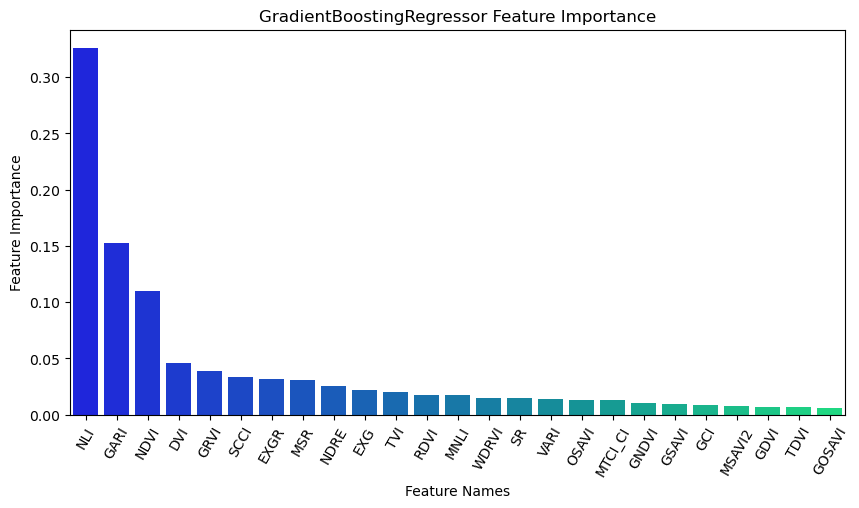

Masbasis_2019_Simps
RandomForestRegressor(max_depth=100, min_samples_split=400, n_estimators=50,
                      n_jobs=-1, random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=100, min_samples_split=400,
                                       n_estimators=50, n_jobs=-1,
                                       random_state=1))])
 RMSE Test: 1.99        R2 Test: -0.01
RMSE Train: 2.00       R2 Train: -0.00


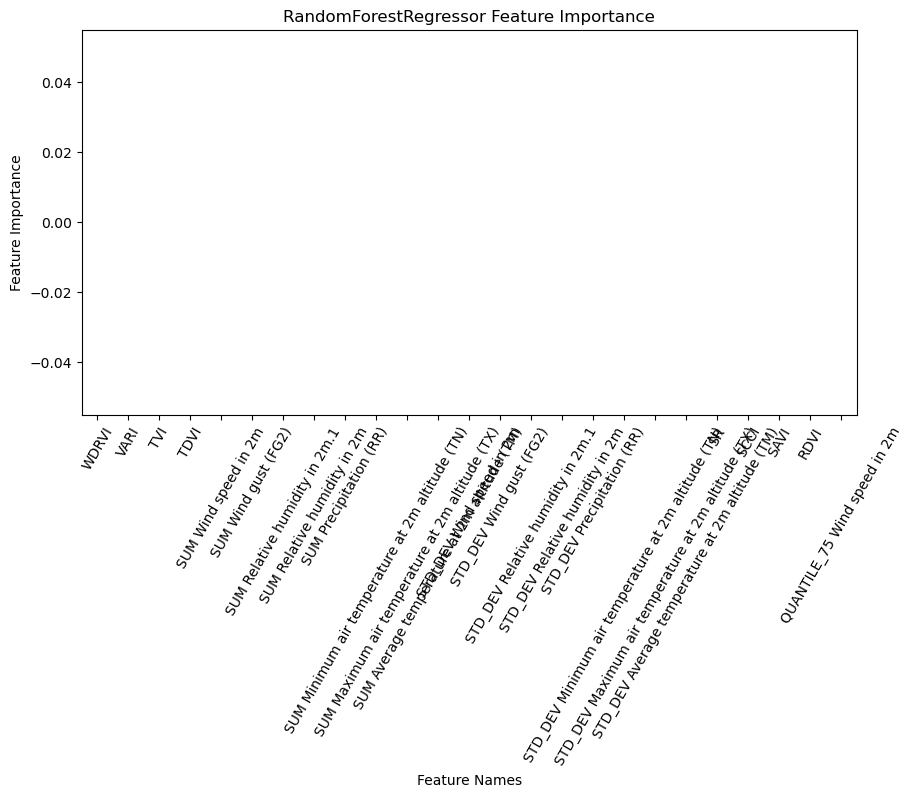

Masbasis_2020_Simps
Masbasis_2020_Simps
LinearRegression
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])
 RMSE Test: 1.55        R2 Test: 0.81
RMSE Train: 1.24       R2 Train: 0.88
Masbasis_2020_Simps
Lasso(alpha=0.9, max_iter=150, random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.9, max_iter=150, random_state=1))])
 RMSE Test: 1.87        R2 Test: 0.73
RMSE Train: 1.83       R2 Train: 0.74
Masbasis_2020_Simps
GradientBoostingRegressor(learning_rate=0.4, random_state=1, subsample=0.8)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(learning_rate=0.4, random_state=1,
                                           subsample=0.8))])
 RMSE Test: 1.68        R2 Test: 0.78
RMSE Train: 0.12       R2 Train: 1.00


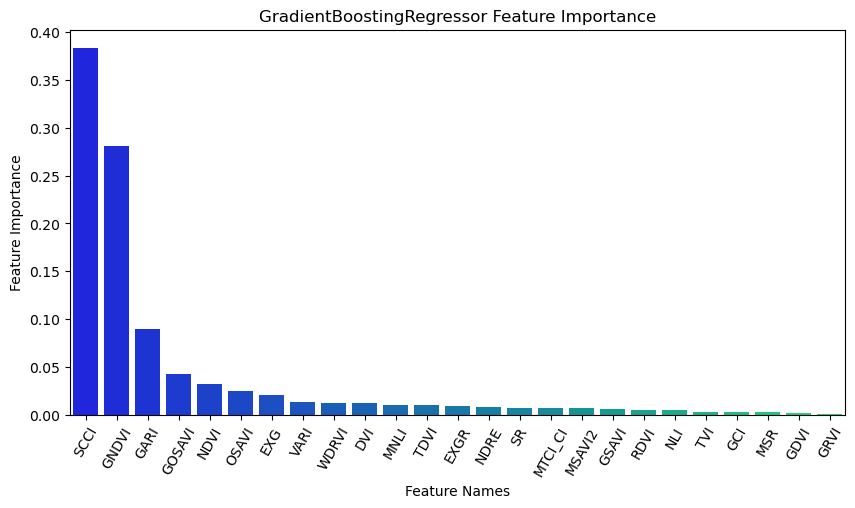

Masbasis_2020_Simps
RandomForestRegressor(max_depth=100, min_samples_split=400, n_estimators=50,
                      n_jobs=-1, random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=100, min_samples_split=400,
                                       n_estimators=50, n_jobs=-1,
                                       random_state=1))])
 RMSE Test: 3.61        R2 Test: -0.00
RMSE Train: 3.62       R2 Train: -0.00


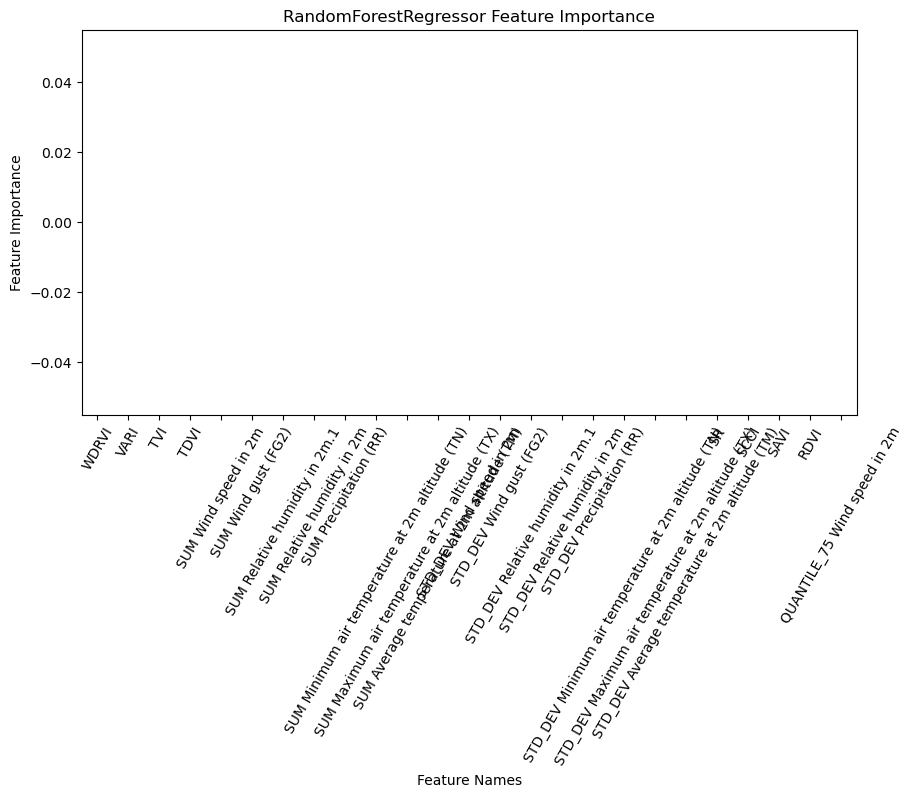

Robot_2020_Simps
Robot_2020_Simps
LinearRegression
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])
 RMSE Test: 3.02        R2 Test: 0.17
RMSE Train: 1.51       R2 Train: 0.80
Robot_2020_Simps
Lasso(alpha=0.9, max_iter=150, random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.9, max_iter=150, random_state=1))])
 RMSE Test: 2.26        R2 Test: 0.55
RMSE Train: 2.21       R2 Train: 0.57
Robot_2020_Simps
GradientBoostingRegressor(learning_rate=0.4, random_state=1, subsample=0.8)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(learning_rate=0.4, random_state=1,
                                           subsample=0.8))])
 RMSE Test: 2.64        R2 Test: 0.38
RMSE Train: 0.00       R2 Train: 1.00


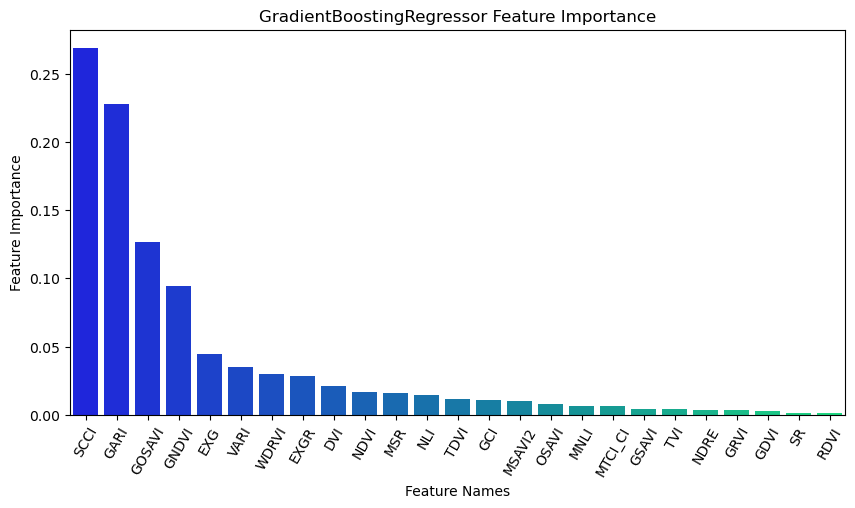

Robot_2020_Simps
RandomForestRegressor(max_depth=100, min_samples_split=400, n_estimators=50,
                      n_jobs=-1, random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=100, min_samples_split=400,
                                       n_estimators=50, n_jobs=-1,
                                       random_state=1))])
 RMSE Test: 3.37        R2 Test: -0.01
RMSE Train: 3.36       R2 Train: -0.00


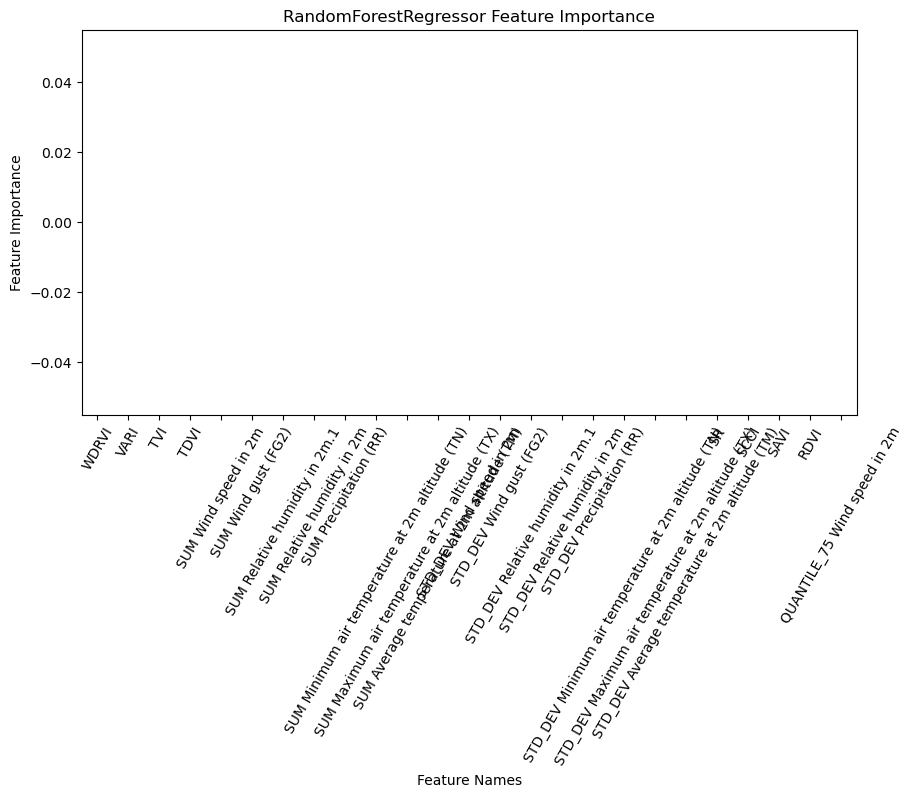

Staur_2019_Simps
Staur_2019_Simps
LinearRegression
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])
 RMSE Test: 11.36        R2 Test: -1.45
RMSE Train: 4.92       R2 Train: 0.66
Staur_2019_Simps
Lasso(alpha=0.9, max_iter=150, random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.9, max_iter=150, random_state=1))])
 RMSE Test: 6.43        R2 Test: 0.42
RMSE Train: 6.37       R2 Train: 0.44
Staur_2019_Simps
GradientBoostingRegressor(learning_rate=0.4, random_state=1, subsample=0.8)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(learning_rate=0.4, random_state=1,
                                           subsample=0.8))])
 RMSE Test: 6.56        R2 Test: 0.40
RMSE Train: 0.42       R2 Train: 1.00


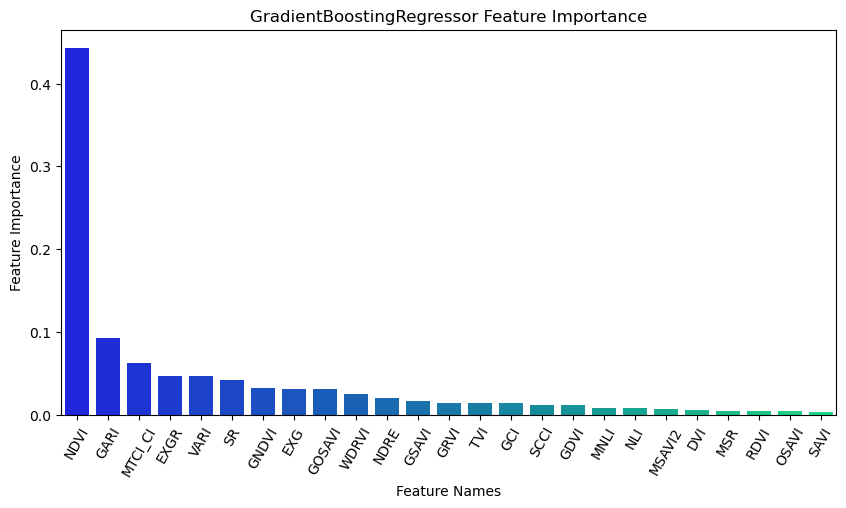

Staur_2019_Simps
RandomForestRegressor(max_depth=100, min_samples_split=400, n_estimators=50,
                      n_jobs=-1, random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=100, min_samples_split=400,
                                       n_estimators=50, n_jobs=-1,
                                       random_state=1))])
 RMSE Test: 8.52        R2 Test: -0.01
RMSE Train: 8.50       R2 Train: -0.00


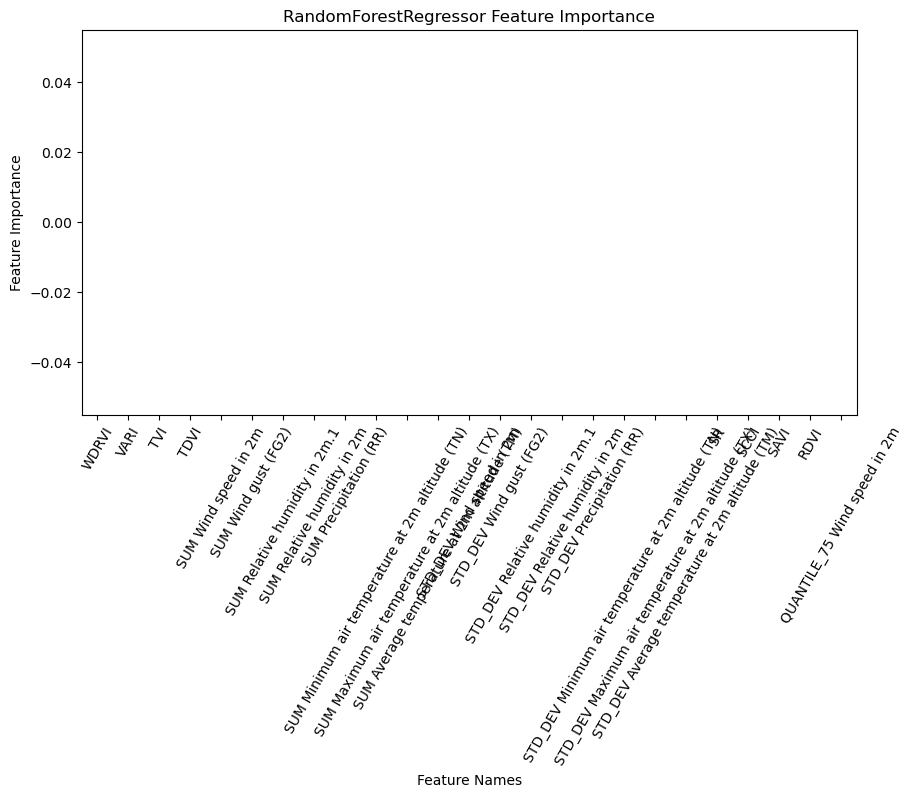

In [50]:
# Iterating through all possible permutations of the fields dataset
for df in all_df_now:
    df_ = locals()[df].copy()

    X = df_[training_features]
    y = df_[target_features].values.ravel()
    groups = df_[group_feature].values.ravel()

    gkf = list(GroupKFold(n_splits=3).split(X, y, groups))
    print(df)
    #     Getting scores using cross_val_score
    for model in models:
        print(df)
        importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp = training_gkf_std(
            model, X, y, gkf)
        if importances is not None:
            plot_feat_imp(importances,
                          model,
                          training_features,
                          threshold=threshold_all)

        save_results(model=model,
                     agg_method=agg_method,
                     train_field=df,
                     test_field=df,
                     training_features=training_features,
                     importances=importances,
                     RMSE_test=RMSE_test_temp,
                     RMSE_train=RMSE_train_temp,
                     R2_test=R2_test_temp,
                     R2_train=R2_train_temp,
                     GKF_CV=GKF_CV_temp)
    del (df, df_, X, y, groups, gkf)
    del (importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp, model)

### One against all - one2one

In [51]:
# # Iterating through all possible permutations of the fields dataset

# for i in itertools.permutations(all_df_now, 2):
#     train_df = locals()[i[0]].copy()
#     test_df = locals()[i[1]].copy()
    
    
#     X_train = train_df[training_features]
#     y_train = train_df[target_features].values.ravel()
#     X_test = test_df[training_features]
#     y_test = test_df[target_features].values.ravel()
    
#     # Getting scores using cross_val_score
#     for model in models:
#         print('Training: ', i[0],'Test: ', i[1], ' : ', model)
#         importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp = training_regr(
#             model, X_train, y_train, X_test, y_test)
#         if importances is not None:
#             plot_feat_imp(importances, model, training_features, threshold=threshold_all, sort_feat=True)
            
#         save_results(model=model,
#              agg_method=agg_method,
#              train_field=i[0],
#              test_field=i[1],
#              training_features=training_features,
#              importances=importances,
#              RMSE_test=RMSE_test_temp,
#              RMSE_train=RMSE_train_temp,
#              R2_test=R2_test_temp,
#              R2_train=R2_train_temp,
#              GKF_CV=GKF_CV_temp)
#     del (i, train_df, test_df, X_train, y_train, X_test, y_test)
#     del (importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp, model)

### One aganist all together

In [52]:
# Iterating through all possible permutations of the fields dataset
for df in all_df_now:
    if 'Robot' not in df:
        temp_list = [
            x for x in all_df_now if not 'Robot' in x if not df in x
        ]
        print(df, temp_list)

        # Making list of df for conct before training
        # This is different form list of srtings, as this is a list of actual dataframes
        train_df_list = []
        for x in temp_list:
            train_df_list.append(locals()[x])

        train_df = pd.concat(train_df_list)
        test_df = locals()[df].copy()

        X_train = train_df[training_features]
        y_train = train_df[target_features].values.ravel()
        X_test = test_df[training_features]
        y_test = test_df[target_features].values.ravel()

        # Getting scores using cross_val_score
        for model in models:
            print('Training: All  ', 'Test: ', df, ' : ', model)
            importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp = training_regr(
                model, X_train, y_train, X_test, y_test)
#             if importances is not None:
#                 plot_feat_imp(importances,
#                               model,
#                               training_features,
#                               threshold=threshold_all,
#                               sort_feat=sorted_all)
            save_results(model=model,
                         agg_method=agg_method,
                         train_field=temp_list,
                         test_field=df,
                         training_features=training_features,
                         importances=importances,
                         RMSE_test=RMSE_test_temp,
                         RMSE_train=RMSE_train_temp,
                         R2_test=R2_test_temp,
                         R2_train=R2_train_temp,
                         GKF_CV=GKF_CV_temp)
        del (df, temp_list, train_df_list, train_df, test_df, X_train, y_train, X_test, y_test)
        del (importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp, model)

Masbasis_2019_Simps ['Masbasis_2020_Simps', 'Staur_2019_Simps']
Training: All   Test:  Masbasis_2019_Simps  :  LinearRegression()
LinearRegression
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])
 RMSE Test: 1089655612981.8622        R2 Test: -2.961277809402365e+23
RMSE Train: 4.055870962075694       R2 Train: 0.80967210106625
Training: All   Test:  Masbasis_2019_Simps  :  Lasso(alpha=0.9, max_iter=150, random_state=1)
Lasso(alpha=0.9, max_iter=150, random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.9, max_iter=150, random_state=1))])
 RMSE Test: 21.787897402779006        R2 Test: -117.39443100968519
RMSE Train: 5.133908816043703       R2 Train: 0.6950486949920132
Training: All   Test:  Masbasis_2019_Simps  :  GradientBoostingRegressor(learning_rate=0.4, random_state=1, subsample=0.8)
GradientBoostingRegressor(learning_rate=0.4, random_state=1, subsample=0.8)
Pipel

### Vollebekk ALL vs Staur ALL

#### Training Staur, Test Vollebekk

Training data: ['Staur_2019_Simps']
Test data: ['Masbasis_2019_Simps', 'Masbasis_2020_Simps']
LinearRegression
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])
 RMSE Test: 852.3073419494582        R2 Test: -6279.63409374412
RMSE Train: 5.046453015625983       R2 Train: 0.6477504529699325
Lasso(alpha=0.9, max_iter=150, random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.9, max_iter=150, random_state=1))])
 RMSE Test: 11.37257382714576        R2 Test: -0.11822336602777916
RMSE Train: 6.396654905386828       R2 Train: 0.4340425020057903
GradientBoostingRegressor(learning_rate=0.4, random_state=1, subsample=0.8)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(learning_rate=0.4, random_state=1,
                                           subsample=0.8))])
 RMSE Test: 13.66844520

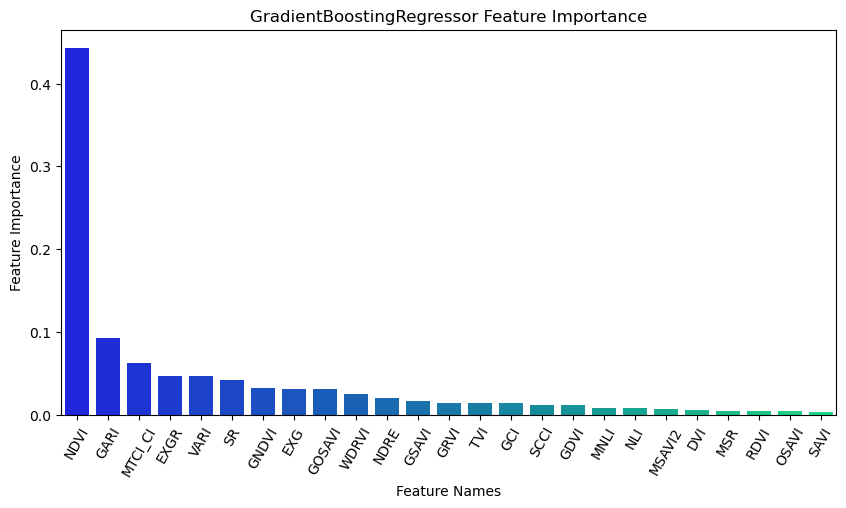

RandomForestRegressor(max_depth=100, min_samples_split=400, n_estimators=50,
                      n_jobs=-1, random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=100, min_samples_split=400,
                                       n_estimators=50, n_jobs=-1,
                                       random_state=1))])
 RMSE Test: 11.220249670955464        R2 Test: -0.08846902586218985
RMSE Train: 8.502957544077491       R2 Train: -4.1438670708382475e-05


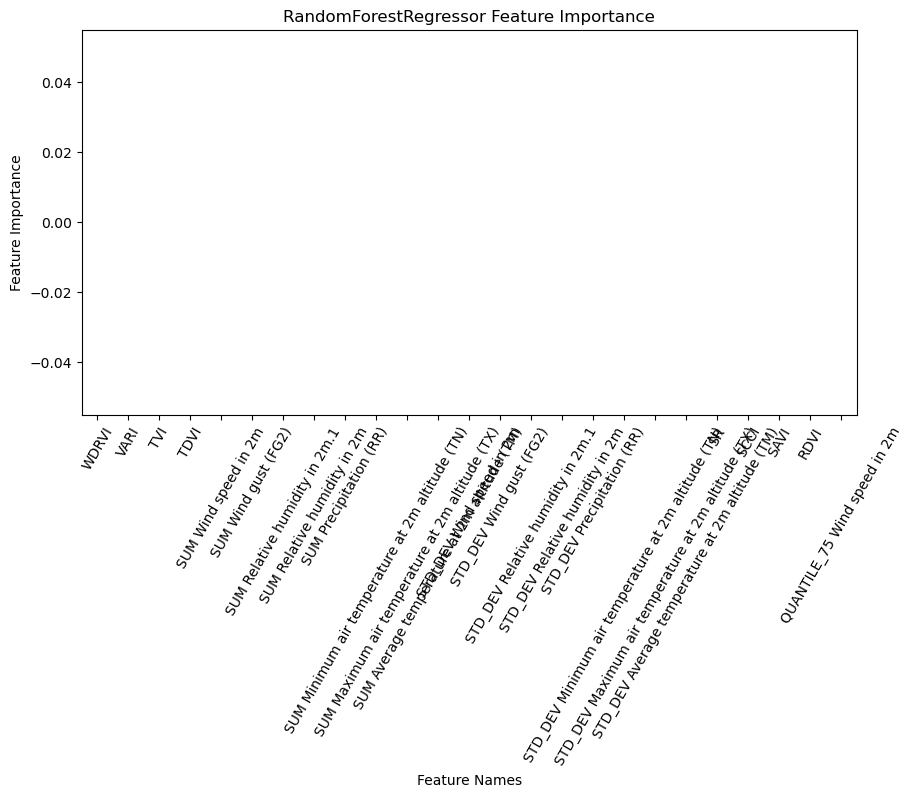

In [53]:
train_str_list, test_str_list = list_test_train_df(all_df_now,
                                                   train_field = 'Staur', 
                                                   test_field = 'Vollebekk', 
                                                   year = 'all')

train_df_list = []
test_df_list = []
for x in train_str_list:
    train_df_list.append(locals()[x])
for x in test_str_list:
    test_df_list.append(locals()[x])

train_df = pd.concat(train_df_list)
test_df = pd.concat(test_df_list)

X_train = train_df[training_features]
y_train = train_df[target_features].values.ravel()
X_test = test_df[training_features]
y_test = test_df[target_features].values.ravel()

# Getting scores using cross_val_score
for model in models:
    importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp = training_regr(
        model, X_train, y_train, X_test, y_test)
#     if importances is not None:
#         plot_feat_imp(importances,
#                       model,
#                       training_features,
#                       threshold=threshold_all,
#                       sort_feat=sorted_all)
    save_results(model=model,
                 agg_method=agg_method,
                 train_field=train_str_list,
                 test_field=test_str_list,
                 training_features=training_features,
                 importances=importances,
                 RMSE_test=RMSE_test_temp,
                 RMSE_train=RMSE_train_temp,
                 R2_test=R2_test_temp,
                 R2_train=R2_train_temp,
                 GKF_CV=GKF_CV_temp)
del (train_str_list, test_str_list, train_df_list, test_df_list, train_df, test_df, X_train, y_train, X_test, y_test)
del (importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp, model)

#### Training Vollebekk, Test Staur

Training data: ['Masbasis_2019_Simps', 'Masbasis_2020_Simps']
Test data: ['Staur_2019_Simps']
LinearRegression
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])
 RMSE Test: 77.66332251615692        R2 Test: -82.42763017926994
RMSE Train: 1.2210264701113758       R2 Train: 0.9871097544293498
Lasso(alpha=0.9, max_iter=150, random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.9, max_iter=150, random_state=1))])
 RMSE Test: 132.32061795551195        R2 Test: -241.1770673768079
RMSE Train: 2.3371965780311066       R2 Train: 0.9527717866123043
GradientBoostingRegressor(learning_rate=0.4, random_state=1, subsample=0.8)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(learning_rate=0.4, random_state=1,
                                           subsample=0.8))])
 RMSE Test: 9.0453072

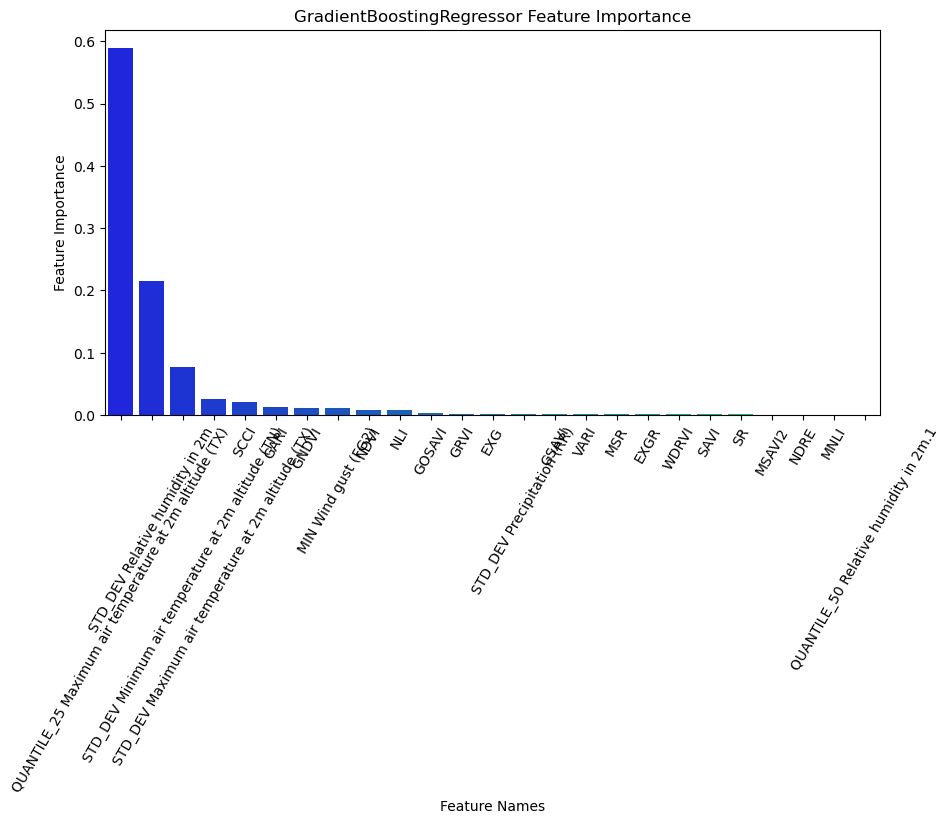

RandomForestRegressor(max_depth=100, min_samples_split=400, n_estimators=50,
                      n_jobs=-1, random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=100, min_samples_split=400,
                                       n_estimators=50, n_jobs=-1,
                                       random_state=1))])
 RMSE Test: 8.672724961966532        R2 Test: -0.04037311950495237
RMSE Train: 2.9365546236918876       R2 Train: 0.9254432101377299


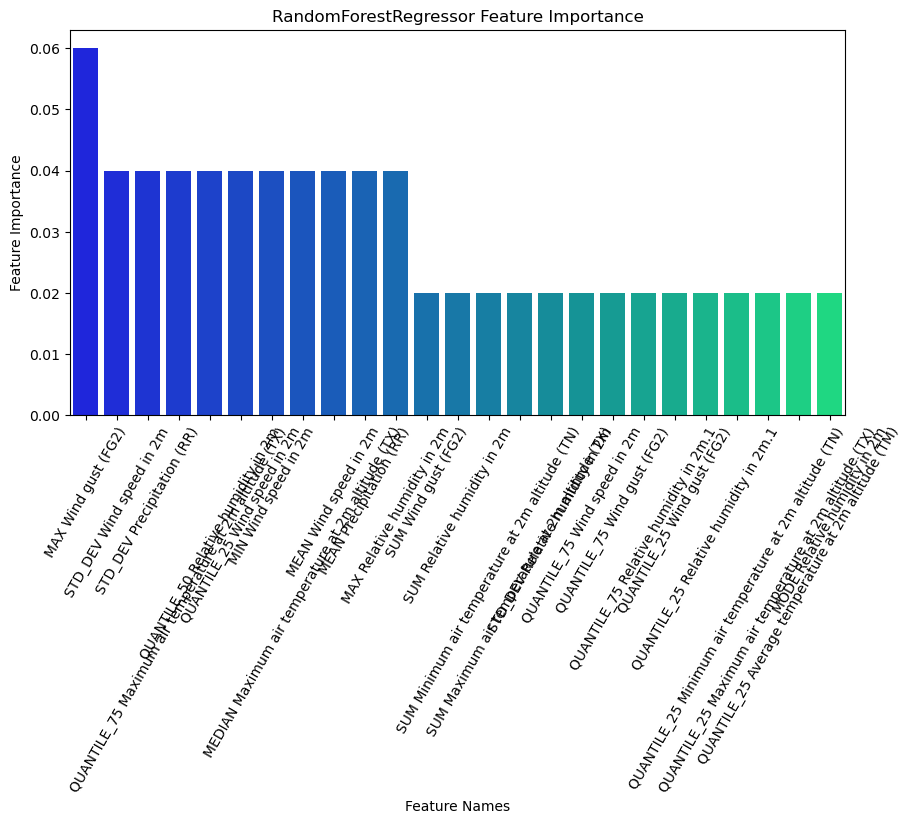

In [54]:
train_str_list, test_str_list = list_test_train_df(all_df_now,
                                                   train_field = 'Vollebekk', 
                                                   test_field = 'Staur', 
                                                   year = 'all')

train_df_list = []
test_df_list = []
for x in train_str_list:
    train_df_list.append(locals()[x])
for x in test_str_list:
    test_df_list.append(locals()[x])

train_df = pd.concat(train_df_list)
test_df = pd.concat(test_df_list)

X_train = train_df[training_features]
y_train = train_df[target_features].values.ravel()
X_test = test_df[training_features]
y_test = test_df[target_features].values.ravel()

# Getting scores using cross_val_score
for model in models:
    importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp = training_regr(
        model, X_train, y_train, X_test, y_test)
#     if importances is not None:
#         plot_feat_imp(importances,
#                       model,
#                       training_features,
#                       threshold=threshold_all,
#                       sort_feat=sorted_all)
    save_results(model=model,
                 agg_method=agg_method,
                 train_field=train_str_list,
                 test_field=test_str_list,
                 training_features=training_features,
                 importances=importances,
                 RMSE_test=RMSE_test_temp,
                 RMSE_train=RMSE_train_temp,
                 R2_test=R2_test_temp,
                 R2_train=R2_train_temp,
                 GKF_CV=GKF_CV_temp)
del (train_str_list, test_str_list, train_df_list, test_df_list, train_df, test_df, X_train, y_train, X_test, y_test)
del (importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp, model)

### 2020 Vollebekk vs 2020 Staur

#### Training Staur, Test Vollebekk

In [55]:
# train_str_list, test_str_list = list_test_train_df(all_df_now,
#                                                    train_field = 'Staur', 
#                                                    test_field = 'Vollebekk', 
#                                                    year = '2020')

# train_df_list = []
# test_df_list = []
# for x in train_str_list:
#     train_df_list.append(locals()[x])
# for x in test_str_list:
#     test_df_list.append(locals()[x])

# train_df = pd.concat(train_df_list)
# test_df = pd.concat(test_df_list)

# X_train = train_df[training_features]
# y_train = train_df[target_features].values.ravel()
# X_test = test_df[training_features]
# y_test = test_df[target_features].values.ravel()

# # Getting scores using cross_val_score
# for model in models:
#     importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp = training_regr(
#         model, X_train, y_train, X_test, y_test)
#     if importances is not None:
#         plot_feat_imp(importances,
#                       model,
#                       training_features,
#                       threshold=threshold_all,
#                       sort_feat=sorted_all)
#     save_results(model=model,
#                  agg_method=agg_method,
#                  train_field=train_str_list,
#                  test_field=test_str_list,
#                  training_features=training_features,
#                  importances=importances,
#                  RMSE_test=RMSE_test_temp,
#                  RMSE_train=RMSE_train_temp,
#                  R2_test=R2_test_temp,
#                  R2_train=R2_train_temp,
#                  GKF_CV=GKF_CV_temp)
# del (train_str_list, test_str_list, train_df_list, test_df_list, train_df, test_df, X_train, y_train, X_test, y_test)
# del (importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp, model)

Training data: []
Test data: ['Masbasis_2020_Simps']


ValueError: No objects to concatenate

#### Training Vollebekk, Test Staur

In [ ]:
# train_str_list, test_str_list = list_test_train_df(all_df_now,
#                                                    train_field = 'Vollebekk', 
#                                                    test_field = 'Staur', 
#                                                    year = '2020')

# train_df_list = []
# test_df_list = []
# for x in train_str_list:
#     train_df_list.append(locals()[x])
# for x in test_str_list:
#     test_df_list.append(locals()[x])

# train_df = pd.concat(train_df_list)
# test_df = pd.concat(test_df_list)

# X_train = train_df[training_features]
# y_train = train_df[target_features].values.ravel()
# X_test = test_df[training_features]
# y_test = test_df[target_features].values.ravel()

# # Getting scores using cross_val_score
# for model in models:
#     importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp = training_regr(
#         model, X_train, y_train, X_test, y_test)
#     if importances is not None:
#         plot_feat_imp(importances,
#                       model,
#                       training_features,
#                       threshold=threshold_all,
#                       sort_feat=sorted_all)
#     save_results(model=model,
#                  agg_method=agg_method,
#                  train_field=train_str_list,
#                  test_field=test_str_list,
#                  training_features=training_features,
#                  importances=importances,
#                  RMSE_test=RMSE_test_temp,
#                  RMSE_train=RMSE_train_temp,
#                  R2_test=R2_test_temp,
#                  R2_train=R2_train_temp,
#                  GKF_CV=GKF_CV_temp)
# del (train_str_list, test_str_list, train_df_list, test_df_list, train_df, test_df, X_train, y_train, X_test, y_test)
# del (importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp, model)

### 2019 Vollebekk vs 2019 Staur

#### Training Staur, Test Vollebekk

Training data: ['Staur_2019_Simps']
Test data: ['Masbasis_2019_Simps']
LinearRegression
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])
 RMSE Test: 1069.7896716643456        R2 Test: -285427.56422474445
RMSE Train: 5.046453015625983       R2 Train: 0.6477504529699325
Lasso(alpha=0.9, max_iter=150, random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.9, max_iter=150, random_state=1))])
 RMSE Test: 8.318180271711581        R2 Test: -16.25668167301177
RMSE Train: 6.396654905386828       R2 Train: 0.4340425020057903
GradientBoostingRegressor(learning_rate=0.4, random_state=1, subsample=0.8)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(learning_rate=0.4, random_state=1,
                                           subsample=0.8))])
 RMSE Test: 10.854406569005155        R2 Test

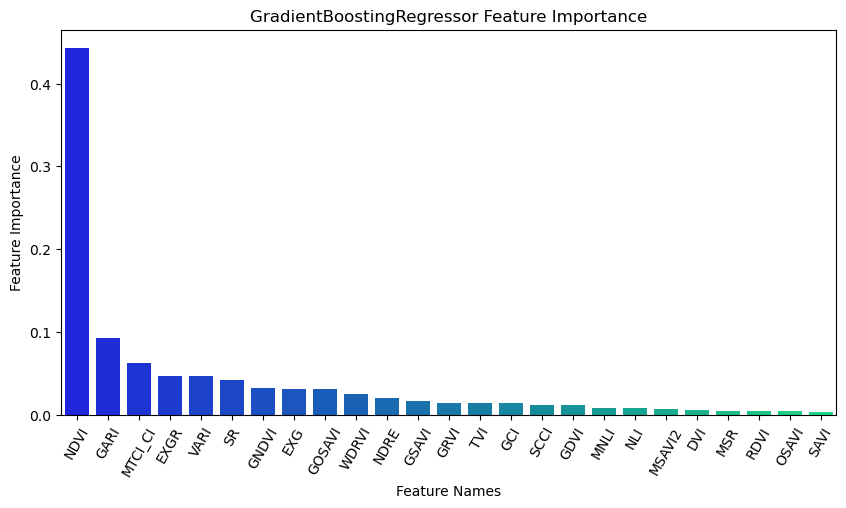

RandomForestRegressor(max_depth=100, min_samples_split=400, n_estimators=50,
                      n_jobs=-1, random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=100, min_samples_split=400,
                                       n_estimators=50, n_jobs=-1,
                                       random_state=1))])
 RMSE Test: 7.600155601330039        R2 Test: -13.406072608176
RMSE Train: 8.502957544077491       R2 Train: -4.1438670708382475e-05


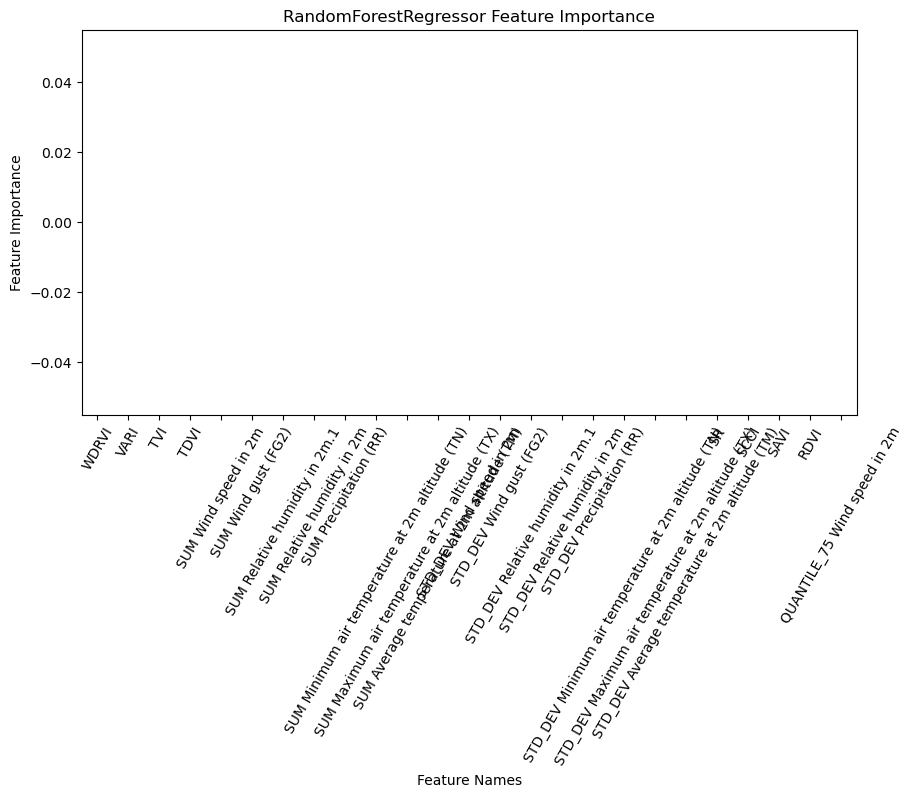

In [59]:
train_str_list, test_str_list = list_test_train_df(all_df_now,
                                                   train_field = 'Staur', 
                                                   test_field = 'Vollebekk', 
                                                   year = '2019')

train_df_list = []
test_df_list = []
for x in train_str_list:
    train_df_list.append(locals()[x])
for x in test_str_list:
    test_df_list.append(locals()[x])

train_df = pd.concat(train_df_list)
test_df = pd.concat(test_df_list)

X_train = train_df[training_features]
y_train = train_df[target_features].values.ravel()
X_test = test_df[training_features]
y_test = test_df[target_features].values.ravel()

# Getting scores using cross_val_score
for model in models:
    importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp = training_regr(
        model, X_train, y_train, X_test, y_test)
    if importances is not None:
#         plot_feat_imp(importances,
#                       model,
#                       training_features,
#                       threshold=threshold_all,
#                       sort_feat=sorted_all)
    save_results(model=model,
                 agg_method=agg_method,
                 train_field=train_str_list,
                 test_field=test_str_list,
                 training_features=training_features,
                 importances=importances,
                 RMSE_test=RMSE_test_temp,
                 RMSE_train=RMSE_train_temp,
                 R2_test=R2_test_temp,
                 R2_train=R2_train_temp,
                 GKF_CV=GKF_CV_temp)
del (train_str_list, test_str_list, train_df_list, test_df_list, train_df, test_df, X_train, y_train, X_test, y_test)
del (importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp, model)

#### Training Vollebekk, Test Staur

Training data: ['Masbasis_2019_Simps']
Test data: ['Staur_2019_Simps']
LinearRegression
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])
 RMSE Test: 1067791052946.3961        R2 Test: -1.5770684012070542e+22
RMSE Train: 1.0690297382896778       R2 Train: 0.7149768045259683
Lasso(alpha=0.9, max_iter=150, random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.9, max_iter=150, random_state=1))])
 RMSE Test: 11.110591221118723        R2 Test: -0.7074669799791025
RMSE Train: 1.799232340356102       R2 Train: 0.19262531322589438
GradientBoostingRegressor(learning_rate=0.4, random_state=1, subsample=0.8)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(learning_rate=0.4, random_state=1,
                                           subsample=0.8))])
 RMSE Test: 10.581063923956567       

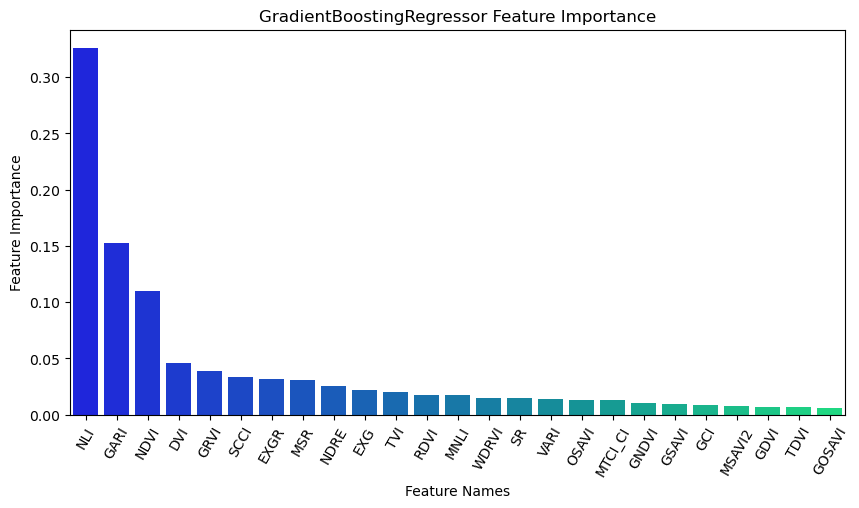

RandomForestRegressor(max_depth=100, min_samples_split=400, n_estimators=50,
                      n_jobs=-1, random_state=1)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=100, min_samples_split=400,
                                       n_estimators=50, n_jobs=-1,
                                       random_state=1))])
 RMSE Test: 11.264984424452681        R2 Test: -0.7552507454306923
RMSE Train: 2.0023969226350298       R2 Train: -2.2332994575879894e-06


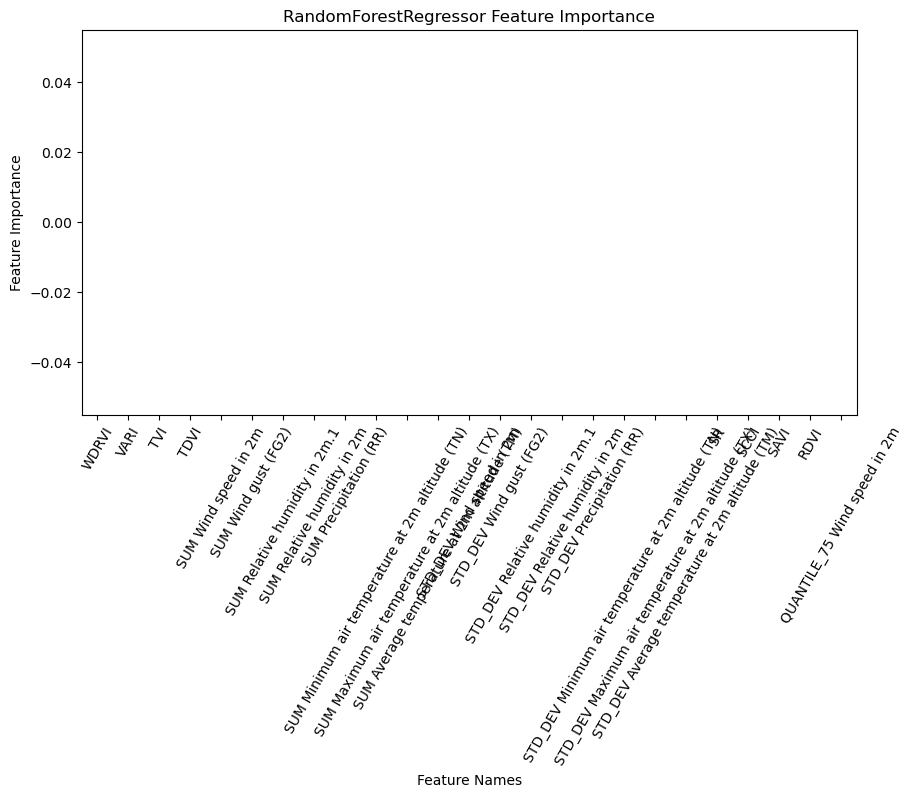

In [60]:
train_str_list, test_str_list = list_test_train_df(all_df_now,
                                                   train_field = 'Vollebekk', 
                                                   test_field = 'Staur', 
                                                   year = '2019')

train_df_list = []
test_df_list = []
for x in train_str_list:
    train_df_list.append(locals()[x])
for x in test_str_list:
    test_df_list.append(locals()[x])

train_df = pd.concat(train_df_list)
test_df = pd.concat(test_df_list)

X_train = train_df[training_features]
y_train = train_df[target_features].values.ravel()
X_test = test_df[training_features]
y_test = test_df[target_features].values.ravel()

# Getting scores using cross_val_score
for model in models:
    importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp = training_regr(
        model, X_train, y_train, X_test, y_test)
    if importances is not None:
#         plot_feat_imp(importances,
#                       model,
#                       training_features,
#                       threshold=threshold_all,
#                       sort_feat=sorted_all)
    save_results(model=model,
                 agg_method=agg_method,
                 train_field=train_str_list,
                 test_field=test_str_list,
                 training_features=training_features,
                 importances=importances,
                 RMSE_test=RMSE_test_temp,
                 RMSE_train=RMSE_train_temp,
                 R2_test=R2_test_temp,
                 R2_train=R2_train_temp,
                 GKF_CV=GKF_CV_temp)
del (train_str_list, test_str_list, train_df_list, test_df_list, train_df, test_df, X_train, y_train, X_test, y_test)
del (importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp, model)

###

In [ ]:
BREAK

###

# Plotting Results

In [ ]:
results_csv = pd.read_csv(export_path+'results_org.csv')
res_df = results_csv[['Aggregation_method','Train_field', 'Test_field', 'RMSE_test', 'RMSE_train',
       'R2_test', 'R2_train']]

In [ ]:
res_simp = res_df[res_df.Aggregation_method == 'Simpsons']
res_simp.drop(['Aggregation_method'], axis=1, inplace=True)
res_simp

In [ ]:
plot_res_df = np.array(res_simp.iloc[49:-1,4:])
plot_res_df = plot_res_df.astype(np.float)
plot_res_df

In [ ]:
import numpy  as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

matrix = plot_res_df

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xpos = [range(matrix.shape[0])]
ypos = [range(matrix.shape[1])]
xpos, ypos = np.meshgrid(xpos, ypos)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)

dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = matrix.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz,  zsort='average')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x, y = np.random.rand(2, 100) * 4
hist, xedges, yedges = np.histogram2d(x, y, bins=4, range=[[0, 4], [0, 4]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

In [ ]:
y

In [ ]:
hist

# GRID SEARCH

## Variables

In [ ]:
threshold_all = 'top_25'
sorted_all = True
agg_method = 'Simpsons'
# agg_method = 'Trapezoid'
# training_features = base_indices + spectral_indices + environment_var
# training_features = base_indices + spectral_indices + weather_features
training_features =  spectral_indices + weather_features
# training_features = spectral_indices

target_features

group_feature = ['Name']

if agg_method == 'Simpsons':
    all_df_now = all_df_simps.copy()
elif agg_method == 'Trapezoid': 
    all_df_now = all_df_trapz.copy()

In [ ]:
temp_list = [x for x in all_df_now if not 'Robot' in x]

# Making list of df for conct before training
# This is different form list of srtings, as this is a list of actual dataframes
df_list = []
for x in temp_list:
    df_list.append(locals()[x])

df_ = pd.concat(df_list)

X = df_[training_features].values
y = df_[target_features].values
groups = df_[group_feature].values.ravel()

gkf = list(GroupKFold(n_splits=6).split(X, y, groups))


## Testing

In [ ]:
scores = ['neg_root_mean_squared_error', 'r2']
cv = 5
core = 6
verbos = 5

## Trying several models

### RandomForestRegressor

In [ ]:
scores = ['neg_root_mean_squared_error', 'r2']
cv = 5
core = 6
verbos = 5

#==============================================================================
# RandomForestRegressor
#==============================================================================
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_grid = {
    'model__n_estimators': n_estimators,
#                'model__max_features': max_features,
#                'model__max_depth': max_depth,
#                'model__min_samples_split': min_samples_split,
#                'model__min_samples_leaf': min_samples_leaf,
               'model__bootstrap': bootstrap}


estimator = pipe

# for score in scores:
# grid(Xtrain = X,
#             ytrain = y,
#             estimator = pipe,
#             params_grid = param_grid,
#             scores=scores,
#             cvs = cv,
#             cores=core,
#             verb=verbos)
# print(score)

### GradientBoostingRegressor

In [ ]:
#==============================================================================
# GradientBoostingRegressor
#==============================================================================
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
# param_grid   =  [{'model__loss' : ['ls', 'lad', 'huber', 'quantile'],
# #                   'model__learning_rate' : [0.001, 0.01, 0.1, 1],
# #                   'model__n_estimators' : range(0,500, 100),
                  
# #                   'model__max_depth':range(5,16,2), 
# #                   'model__min_samples_split':range(200,1100, 200), # 2100
# #                   'model__min_samples_leaf':range(30,71,10),
#                   'model__max_features':range(7,20,2),
#                   'model__subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}]

param_grid   =  [{'model__loss' : ['huber'],
#                   'model__learning_rate' : [0.001, 0.01, 0.1, 1],
#                   'model__n_estimators' : range(0,500, 100),
                  
                  'model__max_depth':range(5,16,2), 
#                   'model__min_samples_split':range(2,5), # 2100
#                   'model__min_samples_leaf':range(1,2),
#                   'model__max_features':range(5,6),
                  'model__subsample':[0.7,0.8]}]
# pipe.get_params()
estimator = pipe

for score in scores:
    grid(Xtrain = X.values,
                ytrain = y.values,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)

### Lasso

In [ ]:
#==============================================================================
# Lasso
#==============================================================================
from sklearn.linear_model import Lasso
model = Lasso()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__alpha' : [x*0.1 for x in range(1,10)],
                  'model__max_iter' : [x for x in range(50, 10000, 50)],
                  'model__selection' : ['cyclic','random']}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)

### Ridge Regressions

In [ ]:
#==============================================================================
# Ridge
#==============================================================================
from sklearn.linear_model import Ridge
model = Ridge()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__alpha' : [x*1. for x in range(1,10)],
                  'model__solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)

### ElasticNet

In [ ]:
#==============================================================================
# ElasticNet
#==============================================================================
from sklearn.linear_model import ElasticNet
model = ElasticNet()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__alpha' : [x*0.1 for x in range(1,10)],
                  'model__max_iter' : [x for x in range(50, 10000, 50)],
                  'model__l1_ratio' : [x*0.1 for x in range(1,10)]}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)

### OrthogonalMatchingPursuit

In [ ]:
#==============================================================================
# OrthogonalMatchingPursuit
#==============================================================================
from sklearn.linear_model import OrthogonalMatchingPursuit
model = OrthogonalMatchingPursuit()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__fit_intercept' : [True, False],
                  'model__n_nonzero_coefs' : [x for x in range(1,10)]}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)

### BayesianRidge

In [ ]:
#==============================================================================
# BayesianRidge
#==============================================================================
from sklearn.linear_model import BayesianRidge
model = BayesianRidge()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__n_iter' : [x for x in range(5, 150, 10)],
                  'model__alpha_1' : [1.0],
                  'model__alpha_2' : [x*0.000001 for x in [1,10,100,1000,10000,100000,1000000]],
                  'model__lambda_1' : [x*0.000001 for x in [1,10,100,1000,10000,100000,1000000]],
                  'model__lambda_2' : [1.0]}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)

### ARDRegression

In [ ]:
#==============================================================================
# ARDRegression
#==============================================================================
from sklearn.linear_model import ARDRegression
model = ARDRegression()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__n_iter' : [x for x in range(5, 150, 10)],
                  'model__alpha_1' : [1.0],
#                       'model__alpha_2' : [x*0.000001 for x in [1,10,100,1000,10000,100000,1000000]],
                  'model__lambda_1' : [0.01],
                  'model__lambda_2' : [x*0.000001 for x in [1,10,100,1000,10000,100000,1000000]],
                  'model__verbose' : [True]}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)

### RANSACRegressor

In [ ]:
#==============================================================================
# RANSACRegressor
#==============================================================================
from sklearn.linear_model import RANSACRegressor
model = RANSACRegressor()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__min_samples' : [x/.1 for x in range(1, 10)],
                  'model__max_trials' : [x for x in range(1, 500,50)],
                  'model__loss' : ['absolute_loss', 'squared_loss']}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)

### TheilSenRegressor

In [ ]:
#==============================================================================
# TheilSenRegressor
#==============================================================================
# from sklearn.linear_model import TheilSenRegressor
# model = TheilSenRegressor()
# sc = StandardScaler()
# pipe = Pipeline(steps=[('sc', sc), ('model', model)])
# param_grid   =  [{'model__max_subpopulation' : [x*0.000001 for x in [1,10,100,1000,10000,100000,1000000]],
#                   'model__n_subsamples' : [x for x in range(9, 1300,50)],
#                   'model__max_iter' :  [x for x in range(50, 1000, 50)]}]
# estimator = pipe

# for score in scores:
#     grid(Xtrain = X,
#                 ytrain = y,
#                 estimator = pipe,
#                 params_grid = param_grid,
#                 scores=score,
#                 cvs = cv,
#                 cores=core,
#                 verb=verbos)
#     print(score)

### HuberRegressor

In [ ]:
#==============================================================================
# HuberRegressor
#==============================================================================
from sklearn.linear_model import HuberRegressor
model = HuberRegressor()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__epsilon' : [x/.01 for x in range(100, 200, 5)],
                  'model__alpha' : [x*0.000001 for x in [1,10,100,1000,10000,100000,1000000]]}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)

### DecisionTreeRegressor

In [ ]:
#==============================================================================
# DecisionTreeRegressor
#==============================================================================
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__max_depth' : [None]+[x for x in range(1, 100,5)],
                  'model__min_samples_leaf' : [x for x in range(1, 50,5)],
                  'model__min_samples_split' : [2]+[x for x in range(1, 50,5)],
                  'model__max_features' : [x for x in range(1, 10)]}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)

### GaussianProcessRegressor

In [ ]:
#==============================================================================
# GaussianProcessRegressor
#==============================================================================
from sklearn.gaussian_process import GaussianProcessRegressor
model = GaussianProcessRegressor()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__kernel' : [None]+['rbf', 'sigmoid',  'linear', 'poly'],
                  'model__alpha' : [x*0.0000000001 for x in [1,10,100,1000,10000,100000,1000000]]}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)

### KNeighborsRegressor

In [ ]:
#==============================================================================
# KNeighborsRegressor
#==============================================================================
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__n_neighbors' : [x for x in range(1, 100,5)],
                  'model__weights' : ['uniform', 'distance'],
                  'model__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                  'model__leaf_size' : [x for x in range(10, 50, 5)]}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)

### RadiusNeighborsRegressor

In [ ]:
# #==============================================================================
# # RadiusNeighborsRegressor
# #==============================================================================
# from sklearn.neighbors import RadiusNeighborsRegressor
# model = RadiusNeighborsRegressor()
# sc = StandardScaler()
# pipe = Pipeline(steps=[('sc', sc), ('model', model)])
# param_grid   =  [{'model__radius' : [x*1. for x in range(1, 10)],
#                   'model__weights' : ['uniform', 'distance'],
#                   'model__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#                   'model__p' : [x for x in range(1, 10)]}]
# estimator = pipe

# for score in scores:
#     grid(Xtrain = X,
#                 ytrain = y,
#                 estimator = pipe,
#                 params_grid = param_grid,
#                 scores=score,
#                 cvs = cv,
#                 cores=core,
#                 verb=verbos)
#     print(score)

### SVR

In [ ]:
# #==============================================================================
# # SVR
# #==============================================================================
# from sklearn.svm import SVR
# model = SVR()
# sc = StandardScaler()
# pipe = Pipeline(steps=[('sc', sc), ('model', model)])
# param_grid   =  [{'model__radius' : [x*1. for x in range(1, 10)],
#                   'model__weights' : ['uniform', 'distance'],
#                   'model__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#                   'model__p' : [x for x in range(1, 10)]}]
# estimator = pipe

# for score in scores:
#     grid(Xtrain = X,
#                 ytrain = y,
#                 estimator = pipe,
#                 params_grid = param_grid,
#                 scores=score,
#                 cvs = cv,
#                 cores=core,
#                 verb=verbos)
#     print(score)

### RandomForestRegressor

In [ ]:
#==============================================================================
# RandomForestRegressor
#==============================================================================
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__max_depth' : [x for x in range(1, 10)],
                  'model__max_features' : ['auto', 'sqrt', 'log2'],
                  'model__n_estimators' : [x for x in range(1, 1000, 50)]}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)


In [ ]:
# t_end = time.time()
# tt = t_end - t_start
# time_taken.append(tt)
# print('Total time complete: ', (tt) / 60, 'minutes')

## Permutation importance

In [ ]:


# PERMUTATION

from sklearn.inspection import permutation_importance


result = permutation_importance(gs_xgb_fitted, X_test, y_test, n_repeats=100, random_state=0)

# ==================================
# Feature selection
# ===================================

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# define feature selection
fs = SelectKBest(score_func=f_regression, k=10)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

# Plot importances
fig, ax = plt.subplots(figsize=(25, 25))
ind = indices = np.argsort(result.importances_mean)[::-1]
plt.barh(X_test.columns, result.importances_mean[ind])
plt.show()


In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'macro'),
           'recall': make_scorer(recall_score, average = 'macro'),
           'f1': make_scorer(f1_score, average = 'macro')}
grid_search_rfc = GridSearchCV(rfc, param_grid = grid_values, scoring = scoring, refit='f1')
grid_search_rfc.fit(x_train, y_train)

grid_search_rfc.best_params_
grid_search_rfc.cv_results_

# cv_results[‘mean_test_<metric_name>’]
grid_search_rfc.cv_results_['mean_test_recall']


## Restart the kernel

In [ ]:
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")